In [1062]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None) # para visualizar la totalidad de columnas

# Imputación de nulos usando métodos avanzados estadísticos
#-----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Librerías de visualización
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Evaluar linealidad de las relaciones entre las variables
# y la distribución de las variables
# ------------------------------------------------------------------------------
#import scipy.stats as stats
import scipy.stats as st
import scipy.stats as stats
from scipy.stats import shapiro, poisson, chisquare, expon, kstest

In [1063]:
#cargamos el dataframe
df_talento = pd.read_csv("transformando_talento.csv")


A partir de aqui, empezamos a analizar los datos que contiene el dataframe: 

-Revisión de estructura  
-Tipos de datos, estadística  
-Valores únicos  
-Duplicados  
-Nulos  



In [1064]:
df_talento.head()

,Unnamed: 0,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,employeecount,employeenumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NUMCOMPANIESWORKED,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TOTALWORKINGYEARS,TrainingTimesLastYear,WORKLIFEBALANCE,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YEARSWITHCURRMANAGER,SameAsMonthlyIncome,DateBirth,Salary,RoleDepartament,NUMBERCHILDREN,RemoteWork
0,0,51,No,NaN,"684,0$",NaN,6,3,NaN,1,"162,0",1,0,51,3,5,resEArch DIREcToR,3,NaN,"19537,0",6462,7,Y,No,13,"3,0",3,NaN,0,NaN,5,"3,0",20,NaN,15,15,"19537,0",1972,1000000000$,NaN,NaN,Yes
1,1,52,No,NaN,"699,0$",NaN,1,4,Life Sciences,1,"259,0",3,0,65,2,5,ManAGeR,3,NaN,"19999,0",5678,0,NaN,NaN,14,"3,0",1,NaN,1,"34,0",5,"3,0",33,NaN,11,9,"19999,0",1971,1000000000$,NaN,NaN,1
2,2,42,No,travel_rarely,"532,0$",Research & Development,4,2,Technical Degree,1,"319,0",3,0,58,3,5,ManaGER,4,Married,"19232,0",4933,1,NaN,No,11,"3,0",4,NaN,0,"22,0",3,NaN,22,NaN,11,15,"19232,0",1981,1000000000$,ManaGER - Research & Development,NaN,1
3,3,47,No,travel_rarely,"359,0$",NaN,2,4,Medical,1,NaN,1,1,82,3,4,ReseArCH DIrECtOr,3,Married,"17169,0",26703,3,Y,NaN,19,"3,0",2,NaN,2,NaN,2,NaN,20,NaN,5,6,"17169,0",1976,1000000000$,NaN,NaN,False
4,4,46,No,NaN,"1319,0$",NaN,3,3,Technical Degree,1,NaN,1,1,45,4,4,sAleS EXECUtIve,1,Divorced,NaN,7739,2,Y,No,12,"3,0",4,NaN,1,NaN,5,"3,0",19,NaN,2,8,NaN,1977,1000000000$,NaN,NaN,0


In [1065]:
df_talento = pd.read_csv("transformando_talento.csv", index_col=0) # Lo cargamos ignorando el índice.


In [1066]:
df_talento.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,employeecount,employeenumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NUMCOMPANIESWORKED,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TOTALWORKINGYEARS,TrainingTimesLastYear,WORKLIFEBALANCE,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YEARSWITHCURRMANAGER,SameAsMonthlyIncome,DateBirth,Salary,RoleDepartament,NUMBERCHILDREN,RemoteWork
0,51,No,NaN,"684,0$",NaN,6,3,NaN,1,"162,0",1,0,51,3,5,resEArch DIREcToR,3,NaN,"19537,0",6462,7,Y,No,13,"3,0",3,NaN,0,NaN,5,"3,0",20,NaN,15,15,"19537,0",1972,1000000000$,NaN,NaN,Yes
1,52,No,NaN,"699,0$",NaN,1,4,Life Sciences,1,"259,0",3,0,65,2,5,ManAGeR,3,NaN,"19999,0",5678,0,NaN,NaN,14,"3,0",1,NaN,1,"34,0",5,"3,0",33,NaN,11,9,"19999,0",1971,1000000000$,NaN,NaN,1
2,42,No,travel_rarely,"532,0$",Research & Development,4,2,Technical Degree,1,"319,0",3,0,58,3,5,ManaGER,4,Married,"19232,0",4933,1,NaN,No,11,"3,0",4,NaN,0,"22,0",3,NaN,22,NaN,11,15,"19232,0",1981,1000000000$,ManaGER - Research & Development,NaN,1
3,47,No,travel_rarely,"359,0$",NaN,2,4,Medical,1,NaN,1,1,82,3,4,ReseArCH DIrECtOr,3,Married,"17169,0",26703,3,Y,NaN,19,"3,0",2,NaN,2,NaN,2,NaN,20,NaN,5,6,"17169,0",1976,1000000000$,NaN,NaN,False
4,46,No,NaN,"1319,0$",NaN,3,3,Technical Degree,1,NaN,1,1,45,4,4,sAleS EXECUtIve,1,Divorced,NaN,7739,2,Y,No,12,"3,0",4,NaN,1,NaN,5,"3,0",19,NaN,2,8,NaN,1977,1000000000$,NaN,NaN,0


In [1067]:
df_talento.shape  #Número de filas y columnas.

(1614, 41)

In [1068]:
df_talento.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'employeecount',
       'employeenumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NUMCOMPANIESWORKED',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TOTALWORKINGYEARS', 'TrainingTimesLastYear', 'WORKLIFEBALANCE',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YEARSWITHCURRMANAGER', 'SameAsMonthlyIncome', 'DateBirth', 'Salary',
       'RoleDepartament', 'NUMBERCHILDREN', 'RemoteWork'],
      dtype='object')

####  Nombres de las columnas:  
Los nombres de las columnas no son homogeneos, queremos modificarlos de tal manera que todas las palabras empiecen por mayúsculas y que lleven guión bajo separando palabras. 

In [1069]:
#Función que agrega _ delante de las mayúsculas en el medio de las palabras del título de las columnas.
def add_spaces_to_columns(df_talento):
    df_talento.columns = df_talento.columns.str.replace(r'(?<!^)(?=[A-Z])', '_', regex=True).str.title()
    return df_talento


In [1070]:
df_talento = add_spaces_to_columns(df_talento)  # Aplicamos la función.


In [1071]:
df_talento.columns


Index(['Age', 'Attrition', 'Business_Travel', 'Daily_Rate', 'Department',
       'Distance_From_Home', 'Education', 'Education_Field', 'Employeecount',
       'Employeenumber', 'Environment_Satisfaction', 'Gender', 'Hourly_Rate',
       'Job_Involvement', 'Job_Level', 'Job_Role', 'Job_Satisfaction',
       'Marital_Status', 'Monthly_Income', 'Monthly_Rate',
       'N_U_M_C_O_M_P_A_N_I_E_S_W_O_R_K_E_D', 'Over18', 'Over_Time',
       'Percent_Salary_Hike', 'Performance_Rating',
       'Relationship_Satisfaction', 'Standard_Hours', 'Stock_Option_Level',
       'T_O_T_A_L_W_O_R_K_I_N_G_Y_E_A_R_S', 'Training_Times_Last_Year',
       'W_O_R_K_L_I_F_E_B_A_L_A_N_C_E', 'Years_At_Company',
       'Years_In_Current_Role', 'Years_Since_Last_Promotion',
       'Y_E_A_R_S_W_I_T_H_C_U_R_R_M_A_N_A_G_E_R', 'Same_As_Monthly_Income',
       'Date_Birth', 'Salary', 'Role_Departament',
       'N_U_M_B_E_R_C_H_I_L_D_R_E_N', 'Remote_Work'],
      dtype='object')

In [1072]:
#Cambiamos los nombres que todavía no están homogeneos.
df_talento.rename(columns={'N_U_M_C_O_M_P_A_N_I_E_S_W_O_R_K_E_D':'Num_Companies_Worked',
                           'T_O_T_A_L_W_O_R_K_I_N_G_Y_E_A_R_S':'Total_Working_Years',
                             'W_O_R_K_L_I_F_E_B_A_L_A_N_C_E':'Work_Life_Balance',
                             'Y_E_A_R_S_W_I_T_H_C_U_R_R_M_A_N_A_G_E_R':'Years_With_Current_Manager',
                             'N_U_M_B_E_R_C_H_I_L_D_R_E_N':'Number_Children','Role_Departament':'Role_Department', 'Employeenumber':'Employee_Number'}, inplace=True)



In [1073]:
df_talento.info() # información de no nulos y tipo de datos.

<class 'pandas.core.frame.DataFrame'>
Index: 1614 entries, 0 to 1613
Data columns (total 41 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         1614 non-null   object 
 1   Attrition                   1614 non-null   object 
 2   Business_Travel             842 non-null    object 
 3   Daily_Rate                  1614 non-null   object 
 4   Department                  302 non-null    object 
 5   Distance_From_Home          1614 non-null   int64  
 6   Education                   1614 non-null   int64  
 7   Education_Field             869 non-null    object 
 8   Employeecount               1614 non-null   int64  
 9   Employee_Number             1183 non-null   object 
 10  Environment_Satisfaction    1614 non-null   int64  
 11  Gender                      1614 non-null   int64  
 12  Hourly_Rate                 1614 non-null   object 
 13  Job_Involvement             1614 non-n

In [1074]:
df_talento.describe().T

,count,mean,std,min,25%,50%,75%,max
Distance_From_Home,1614.0,4.527261,14.591913,-49.0,2.0,5.0,11.0,29.0
Education,1614.0,2.925031,1.022357,1.0,2.0,3.0,4.0,5.0
Employeecount,1614.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
Environment_Satisfaction,1614.0,4.294919,6.993559,1.0,2.0,3.0,4.0,49.0
Gender,1614.0,0.398389,0.489718,0.0,0.0,0.0,1.0,1.0
Job_Involvement,1614.0,2.739777,0.711567,1.0,2.0,3.0,3.0,4.0
Job_Level,1614.0,2.068154,1.101344,1.0,1.0,2.0,3.0,5.0
Job_Satisfaction,1614.0,2.738538,1.106163,1.0,2.0,3.0,4.0,4.0
Monthly_Rate,1614.0,14284.495663,7110.414585,2094.0,8001.0,14248.5,20364.0,26999.0
Num_Companies_Worked,1614.0,2.673482,2.506152,0.0,1.0,2.0,4.0,9.0


In [1075]:
df_talento.describe(include = 'object').T

,count,unique,top,freq
Age,1614,54,35,84
Attrition,1614,2,No,1355
Business_Travel,842,3,travel_rarely,586
Daily_Rate,1614,849,nan$,124
Department,302,3,Research & Development,196
Education_Field,869,6,Life Sciences,349
Employee_Number,1183,1079,"783,0",2
Hourly_Rate,1614,72,Not Available,84
Job_Role,1614,1579,mANager,4
Marital_Status,963,5,Married,404


In [1076]:
#Eliminamos aquellas columnas que no aportan información de valor, aquellas en las que se repite información o que podemos obtener de otra columna.
df_talento.drop(['Number_Children', 'Same_As_Monthly_Income','Salary', 'Over18', 'Date_Birth', 'Standard_Hours', 'Years_In_Current_Role','Employeecount'], axis=1, inplace=True)

In [1077]:
df_talento.columns

Index(['Age', 'Attrition', 'Business_Travel', 'Daily_Rate', 'Department',
       'Distance_From_Home', 'Education', 'Education_Field', 'Employee_Number',
       'Environment_Satisfaction', 'Gender', 'Hourly_Rate', 'Job_Involvement',
       'Job_Level', 'Job_Role', 'Job_Satisfaction', 'Marital_Status',
       'Monthly_Income', 'Monthly_Rate', 'Num_Companies_Worked', 'Over_Time',
       'Percent_Salary_Hike', 'Performance_Rating',
       'Relationship_Satisfaction', 'Stock_Option_Level',
       'Total_Working_Years', 'Training_Times_Last_Year', 'Work_Life_Balance',
       'Years_At_Company', 'Years_Since_Last_Promotion',
       'Years_With_Current_Manager', 'Role_Department', 'Remote_Work'],
      dtype='object')

Environment_Satisfaction: tendrían que ser valores del 1 al 4. La empresa nos indica que si hay números de mas de 1 dígito nos quedemos con el primer dígito. Vamos a ver lo que tenemos en esta columna y a solucionarlo. 

In [1078]:
df_talento['Environment_Satisfaction'].unique() #Valores únicos

array([ 1,  3,  4,  2, 42, 37, 35, 25, 27, 31, 39, 21, 15, 14, 33, 19, 12,
       13, 28, 47, 36, 29, 24, 46, 16, 22, 41, 49, 11, 48, 18, 10, 45, 38,
       17, 20, 26, 43])

In [1079]:
total_valores = len(df_talento['Environment_Satisfaction'])
valores_mayores_4 = (df_talento['Environment_Satisfaction'] > 4).sum()
porcentaje_mayores_4 = (valores_mayores_4 / total_valores) * 100 # Obtenemos el porcentaje de valores mayores que 4.
porcentaje_mayores_4

np.float64(6.195786864931847)

In [1080]:
# Convertimos todos los valores de la columna a tipo string, extraemos el primer carácter y lo convertimos nuevamente a int.
df_talento['Environment_Satisfaction'] = df_talento['Environment_Satisfaction'].astype(str).str[0].astype(int)

In [1081]:
df_talento['Environment_Satisfaction'].unique()

array([1, 3, 4, 2])

In [1082]:
df_talento.sample(5)

,Age,Attrition,Business_Travel,Daily_Rate,Department,Distance_From_Home,Education,Education_Field,Employee_Number,Environment_Satisfaction,Gender,Hourly_Rate,Job_Involvement,Job_Level,Job_Role,Job_Satisfaction,Marital_Status,Monthly_Income,Monthly_Rate,Num_Companies_Worked,Over_Time,Percent_Salary_Hike,Performance_Rating,Relationship_Satisfaction,Stock_Option_Level,Total_Working_Years,Training_Times_Last_Year,Work_Life_Balance,Years_At_Company,Years_Since_Last_Promotion,Years_With_Current_Manager,Role_Department,Remote_Work
778,37,No,travel_rarely,"783,0$",NaN,7,4,Medical,"1885,0",4,0,78,3,2,rEsEArch sCIenTIsT,1,NaN,"4284,0",13588,5,NaN,22,"4,0",3,1,"16,0",2,"3,0",5,0,4,NaN,1
329,31,No,travel_rarely,"525,0$",NaN,6,4,Medical,"653,0",1,0,66,4,2,SALes EXEcUTiVe,4,Divorced,NaN,6219,4,No,22,"4,0",4,2,"13,0",4,"4,0",7,5,7,NaN,1
962,24,No,non-travel,"1269,0$",NaN,-19,1,Life Sciences,"888,0",1,0,Not Available,2,1,labORatOry TEcHniCIAn,4,NaN,NaN,10778,0,NaN,17,"3,0",4,0,NaN,2,"2,0",5,3,4,NaN,False
167,36,No,travel_rarely,"1266,0$",Sales,-14,4,NaN,NaN,1,1,63,2,2,SaleS EXeCuTivE,3,Marreid,NaN,6060,1,Yes,13,"3,0",1,1,"10,0",4,"3,0",10,1,7,SaleS EXeCuTivE - Sales,False
21,33,No,NaN,"515,0$",NaN,1,2,Life Sciences,"73,0",1,1,98,3,3,RESEARCH dIrECtor,4,Single,NaN,15146,1,Yes,12,"3,0",3,0,"15,0",1,"3,0",15,8,12,NaN,True


In [1083]:
for col in df_talento.select_dtypes(include = 'object'): # nos puede ayudar a ver los datos, si hay algo mal escrito, mayúsculas,... 
    print(col)
    print('--------------------------')
    print(df_talento[col].unique())

Age
--------------------------
['51' '52' '42' '47' '46' '48' '59' '41' '56' '38' '55' '40' '58' '35'
 '45' '33' '36' '34' 'forty-seven' '53' '43' '60' '32' '37' '49' '39' '50'
 '44' '30' 'fifty-eight' '29' '31' '54' '57' '27' 'thirty-six' '28' '26'
 'fifty-five' '25' 'fifty-two' 'thirty-one' '24' 'thirty' '23' '22' '21'
 '20' 'twenty-six' '19' 'thirty-seven' '18' 'thirty-two' 'twenty-four']
Attrition
--------------------------
['No' 'Yes']
Business_Travel
--------------------------
[nan 'travel_rarely' 'travel_frequently' 'non-travel']
Daily_Rate
--------------------------
['684,0$' '699,0$' '532,0$' '359,0$' '1319,0$' '117,0$' '1435,0$' '635,0$'
 '1276,0$' '840,0$' '247,0$' '1369,0$' '201,0$' '1360,0$' '692,0$'
 '1398,0$' '286,0$' '1402,0$' '819,0$' '884,0$' '1238,0$' '515,0$'
 '1223,0$' '202,0$' '928,0$' '607,0$' '266,0$' '429,0$' '589,0$' 'nan$'
 '1180,0$' '1282,0$' '776,0$' '665,0$' '526,0$' '1034,0$' '1403,0$'
 '1499,0$' '580,0$' '859,0$' '263,0$' '1376,0$' '885,0$' '1003,0$'
 '1

Empezamos a cambiar datos en el interior de nuestras columnas.
Revisión dentro de las columnas: Age (texto por números), DailyRate (quitar $ y pasar a numérico), Hourly Rate (numérico), EmployeeNumber (pasar a númerico sin decimales), Job Role (Mal escrito), Marital Status (Divorced y Married tienen errores - Marreid y divorced), Monthly Income (pasar a numérico), Over18 (eliminar), Standar Hours (eliminar), Total Working Year (Pasar a numérico), Year in Current Role (pasar a numérico), SameAsMonthlyIncome (pasar a numérico), Salary (eliminar), RoleDepartament (modificar el interior están mal escritas), RemoteWork (modificar)



Age: sustituímos los números en texto y lo pasamos a numérico.

In [1084]:
df_talento['Age'] = df_talento['Age'].replace({'forty-seven': '47',
                                               'fifty-eight':'58',
                                               'thirty-six':'36',
                                                 'fifty-five':'55',
                                                 'fifty-two':'52',
                                                   'thirty-one':'31',
                                                     'thirty':'30', 
                                                     'twenty-six':'26',
                                                       'thirty-seven':'37',
                                                         'thirty-two': '32',
                                                           'twenty-four':'24'})
                                              
 #Reemplazar los números que están escritos en modo texto.                                            

In [1085]:
df_talento['Age'].unique()

array(['51', '52', '42', '47', '46', '48', '59', '41', '56', '38', '55',
       '40', '58', '35', '45', '33', '36', '34', '53', '43', '60', '32',
       '37', '49', '39', '50', '44', '30', '29', '31', '54', '57', '27',
       '28', '26', '25', '24', '23', '22', '21', '20', '19', '18'],
      dtype=object)

In [1086]:
df_talento['Age'] = df_talento['Age'].astype(int)

Distance_From_Home tiene valores negativos. Las tenemos que sustituir por nulos para luego hacer el tratamiento de nulos. 

In [1087]:
distancias_negativas = df_talento['Distance_From_Home'][df_talento['Distance_From_Home'] < 0].sort_values()
cantidad_negativos = len(distancias_negativas)

print(f"Cantidad de distancias negativas: {cantidad_negativos}")
print(f"Distancias negativas:\n{distancias_negativas}")

Cantidad de distancias negativas: 192
Distancias negativas:
638    -49
708    -49
974    -48
654    -48
1117   -48
        ..
1090   -10
299    -10
845    -10
676    -10
85     -10
Name: Distance_From_Home, Length: 192, dtype: int64


In [1088]:

df_talento.loc[df_talento['Distance_From_Home'] < 0, 'Distance_From_Home'] = np.nan  # Reemplazamos los valores negativos en la columna 'DistanceFromHome' del DataFrame por NaN.

print(df_talento['Distance_From_Home'].isnull().sum()) # Cantidad de nulos columna 'DistanceFromHome' después de convertir los negativos en nulos.


192


Hourly_Rate tiene en su interior 'Not Available'. Habrá que convertirlos a nulos, para luego tratarlos.

In [1089]:
df_talento['Hourly_Rate'].unique()

array(['51', '65', '58', '82', '45', '99', '91', '64', '55', '68', '49',
       '61', '79', '31', '69', '48', '80', '74', '98', '59', '33', '56',
       '66', '57', '53', '87', '81', '84', '32', '41', '92', '47',
       'Not Available', '43', '86', '30', '42', '88', '96', '67', '62',
       '72', '78', '89', '52', '50', '90', '37', '94', '76', '60', '46',
       '83', '100', '40', '97', '54', '75', '39', '85', '63', '44', '93',
       '36', '35', '73', '71', '70', '38', '77', '95', '34'], dtype=object)

In [1090]:
# Filtramos Hourly_Rate como 'Not Available' y los contamos
Hourly_Rate_NA = df_talento['Hourly_Rate'][df_talento['Hourly_Rate'] == 'Not Available'].sort_values()
cantidad_HR = len(Hourly_Rate_NA)

# Mostramos los resultados
print(f"Cantidad de Not Available dentro de la columna Hourly_Rate: {cantidad_HR}")

Cantidad de Not Available dentro de la columna Hourly_Rate: 84


In [1091]:
df_talento.loc[df_talento['Hourly_Rate'] == 'Not Available', 'Hourly_Rate'] = np.nan # Reemplazamos los valores 'Not Available' por NaN.

print(df_talento['Hourly_Rate'].isnull().sum())  # Cantidad de nulos para comprobar que coinciden con los 'Not Available' que teníamos.

84


Marital_Status: Modificamos los errores que hay en esta columna.

In [1092]:
df_talento['Marital_Status'] = df_talento['Marital_Status'].replace({'divorced': 'Divorced',
                                            'Marreid':'Married'
                                               })

# Modificamos errores tipográficos.

In [1093]:
df_talento['Marital_Status'].unique()

array([nan, 'Married', 'Divorced', 'Single'], dtype=object)

Remote_Work: Hay diferentes formatos para indicar si trabaja o no de forma remota. Tenemos que homogenizarlo. 

In [1094]:
df_talento['Remote_Work'] = df_talento['Remote_Work'].replace({'Yes': 'True',
                                            '1':'True', '0':'False'
                                               })

# Unificamos los datos.

In [1095]:
df_talento['Remote_Work'].unique()

array(['True', 'False'], dtype=object)

Gender: Convertimos 0 y 1 en Male, Female.

In [1096]:
df_talento['Gender'] = df_talento['Gender'].replace({0: 'Male', 1: 'Female'})

In [1097]:
df_talento['Gender'].unique()

array(['Male', 'Female'], dtype=object)

Role_Department: Quitamos espacios y primera letra en mayúsculas

In [1098]:
df_talento['Role_Department'] = df_talento['Role_Department'].str.strip().str.title()

In [1099]:
df_talento['Role_Department'] = df_talento['Role_Department'].str.replace(r'\s+', ' ', regex=True) #reemplaza múltiples espacios

In [1100]:
df_talento['Role_Department'].unique()

array([nan, 'Manager - Research & Development',
       'Healthcare Representative - Research & Development',
       'Sales Executive - Sales',
       'Laboratory Technician - Research & Development',
       'Manufacturing Director - Research & Development',
       'Research Scientist - Research & Development',
       'Research Director - Research & Development',
       'Human Resources - Human Resources', 'Manager - Sales',
       'Sales Representative - Sales', 'Manager - Human Resources'],
      dtype=object)

Job_Role: Quitamos espacios en blanco y ponemos primera letra en mayúsculas. 

In [1101]:
df_talento['Job_Role'] = df_talento['Job_Role'].str.strip().str.title()

In [1102]:
df_talento['Job_Role']

0            Research Director
1                      Manager
2                      Manager
3            Research Director
4              Sales Executive
                 ...          
1609           Sales Executive
1610     Laboratory Technician
1611           Sales Executive
1612           Sales Executive
1613    Manufacturing Director
Name: Job_Role, Length: 1614, dtype: object

Daily_Rate: Quitamos símbolo del $.

In [1103]:
df_talento['Daily_Rate'] = df_talento['Daily_Rate'].str.replace(r'\$', '', regex=True) #reemplazamos múltiples espacios

In [1104]:
df_talento['Daily_Rate']

0        684,0
1        699,0
2        532,0
3        359,0
4       1319,0
         ...  
1609     530,0
1610     805,0
1611     903,0
1612    1229,0
1613     566,0
Name: Daily_Rate, Length: 1614, dtype: object

Business_Travel: Reemplamos guiones por espacios y primera letra en mayúsculas.

In [1105]:
df_talento['Business_Travel']= df_talento['Business_Travel'].str.replace('_', ' ').str.replace('-', ' ').str.title()
df_talento['Business_Travel']

0                 NaN
1                 NaN
2       Travel Rarely
3       Travel Rarely
4                 NaN
            ...      
1609    Travel Rarely
1610       Non Travel
1611    Travel Rarely
1612       Non Travel
1613              NaN
Name: Business_Travel, Length: 1614, dtype: object

In [1106]:
df_talento.columns

Index(['Age', 'Attrition', 'Business_Travel', 'Daily_Rate', 'Department',
       'Distance_From_Home', 'Education', 'Education_Field', 'Employee_Number',
       'Environment_Satisfaction', 'Gender', 'Hourly_Rate', 'Job_Involvement',
       'Job_Level', 'Job_Role', 'Job_Satisfaction', 'Marital_Status',
       'Monthly_Income', 'Monthly_Rate', 'Num_Companies_Worked', 'Over_Time',
       'Percent_Salary_Hike', 'Performance_Rating',
       'Relationship_Satisfaction', 'Stock_Option_Level',
       'Total_Working_Years', 'Training_Times_Last_Year', 'Work_Life_Balance',
       'Years_At_Company', 'Years_Since_Last_Promotion',
       'Years_With_Current_Manager', 'Role_Department', 'Remote_Work'],
      dtype='object')

In [1107]:
df_talento.sample(5)

,Age,Attrition,Business_Travel,Daily_Rate,Department,Distance_From_Home,Education,Education_Field,Employee_Number,Environment_Satisfaction,Gender,Hourly_Rate,Job_Involvement,Job_Level,Job_Role,Job_Satisfaction,Marital_Status,Monthly_Income,Monthly_Rate,Num_Companies_Worked,Over_Time,Percent_Salary_Hike,Performance_Rating,Relationship_Satisfaction,Stock_Option_Level,Total_Working_Years,Training_Times_Last_Year,Work_Life_Balance,Years_At_Company,Years_Since_Last_Promotion,Years_With_Current_Manager,Role_Department,Remote_Work
676,34,No,Travel Frequently,"303,0",NaN,NaN,4,NaN,"216,0",1,Female,75,3,1,Sales Representative,3,NaN,NaN,11314,6,No,18,"3,0",4,1,NaN,3,"3,0",4,1,2,NaN,False
1354,42,No,NaN,"265,0",NaN,5.0,2,NaN,"1029,0",4,Male,90,3,5,Manager,3,NaN,"18303,0",7770,6,No,13,"3,0",2,0,"21,0",3,"4,0",1,0,0,NaN,True
1015,35,No,NaN,"1212,0",NaN,8.0,2,NaN,NaN,3,Female,78,2,3,Sales Executive,4,Married,NaN,13755,4,NaN,11,"3,0",2,1,"16,0",6,"2,0",13,4,12,NaN,False
1276,36,No,NaN,"506,0",NaN,3.0,3,Technical Degree,"397,0",3,Male,30,3,2,Research Scientist,2,Single,NaN,26285,4,NaN,12,"3,0",4,0,"10,0",2,"3,0",8,7,7,NaN,True
927,25,No,NaN,"810,0",NaN,8.0,3,Life Sciences,"707,0",4,Male,57,4,2,Sales Executive,2,NaN,"4851,0",15678,0,No,22,"4,0",3,1,"4,0",4,"3,0",3,1,2,NaN,False


In [1108]:
df_talento.info() # información de no nulos y tipo de datos.

<class 'pandas.core.frame.DataFrame'>
Index: 1614 entries, 0 to 1613
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         1614 non-null   int64  
 1   Attrition                   1614 non-null   object 
 2   Business_Travel             842 non-null    object 
 3   Daily_Rate                  1614 non-null   object 
 4   Department                  302 non-null    object 
 5   Distance_From_Home          1422 non-null   float64
 6   Education                   1614 non-null   int64  
 7   Education_Field             869 non-null    object 
 8   Employee_Number             1183 non-null   object 
 9   Environment_Satisfaction    1614 non-null   int64  
 10  Gender                      1614 non-null   object 
 11  Hourly_Rate                 1530 non-null   object 
 12  Job_Involvement             1614 non-null   int64  
 13  Job_Level                   1614 non-n

In [1109]:
nulos = df_talento.isnull().sum()
nulos.sort_values(ascending=False)

Department                    1312
Role_Department               1312
Monthly_Income                 843
Business_Travel                772
Education_Field                745
Over_Time                      676
Marital_Status                 651
Total_Working_Years            526
Employee_Number                431
Performance_Rating             195
Distance_From_Home             192
Work_Life_Balance              108
Hourly_Rate                     84
Age                              0
Daily_Rate                       0
Education                        0
Attrition                        0
Job_Satisfaction                 0
Job_Role                         0
Job_Level                        0
Job_Involvement                  0
Environment_Satisfaction         0
Gender                           0
Num_Companies_Worked             0
Monthly_Rate                     0
Stock_Option_Level               0
Relationship_Satisfaction        0
Percent_Salary_Hike              0
Training_Times_Last_

In [1110]:
# % nulos
nulos = df_talento.isnull().sum()/df_talento.shape[0]*100
# % nulos ordenados de mayor a menor
nulos.sort_values(ascending=False)

Department                    81.288724
Role_Department               81.288724
Monthly_Income                52.230483
Business_Travel               47.831475
Education_Field               46.158612
Over_Time                     41.883519
Marital_Status                40.334572
Total_Working_Years           32.589839
Employee_Number               26.703841
Performance_Rating            12.081784
Distance_From_Home            11.895911
Work_Life_Balance              6.691450
Hourly_Rate                    5.204461
Age                            0.000000
Daily_Rate                     0.000000
Education                      0.000000
Attrition                      0.000000
Job_Satisfaction               0.000000
Job_Role                       0.000000
Job_Level                      0.000000
Job_Involvement                0.000000
Environment_Satisfaction       0.000000
Gender                         0.000000
Num_Companies_Worked           0.000000
Monthly_Rate                   0.000000


Tratamiento de Nulos de las Variables Categóricas

In [1111]:
columnas_object_con_nulos = df_talento[df_talento.columns[df_talento.isnull().any()]].select_dtypes(include = "O").columns

In [1112]:
# Veamos, por columna, el porcentaje en el que aparece cada valor
for col in columnas_object_con_nulos:
    print(f"La distribución de las categorías (incluyendo nulos) para la columna", col)
    display(df_talento[col].value_counts(dropna=False, normalize=True) * 100)  # Convertimos a porcentaje
    print("........................")

    #normalize sirve para que me de el porcentaje por columna, pero está en formato decimal, así que multiplicamos por 100

La distribución de las categorías (incluyendo nulos) para la columna Business_Travel


Business_Travel
NaN                  47.831475
Travel Rarely        36.307311
Travel Frequently    10.223048
Non Travel            5.638166
Name: proportion, dtype: float64

........................
La distribución de las categorías (incluyendo nulos) para la columna Department


Department
NaN                         81.288724
 Research & Development     12.143742
 Sales                       5.638166
 Human Resources             0.929368
Name: proportion, dtype: float64

........................
La distribución de las categorías (incluyendo nulos) para la columna Education_Field


Education_Field
NaN                 46.158612
Life Sciences       21.623296
Medical             17.100372
Marketing            6.443618
Technical Degree     4.275093
Other                3.655514
Human Resources      0.743494
Name: proportion, dtype: float64

........................
La distribución de las categorías (incluyendo nulos) para la columna Employee_Number


Employee_Number
NaN       26.703841
783,0      0.123916
789,0      0.123916
793,0      0.123916
803,0      0.123916
            ...    
1669,0     0.061958
1673,0     0.061958
1678,0     0.061958
1697,0     0.061958
58,0       0.061958
Name: proportion, Length: 1080, dtype: float64

........................
La distribución de las categorías (incluyendo nulos) para la columna Hourly_Rate


Hourly_Rate
NaN    5.204461
42     2.044610
66     1.982652
48     1.858736
84     1.796778
         ...   
50     0.929368
53     0.805452
68     0.805452
38     0.743494
34     0.681537
Name: proportion, Length: 72, dtype: float64

........................
La distribución de las categorías (incluyendo nulos) para la columna Marital_Status


Marital_Status
NaN         40.334572
Married     27.199504
Single      20.136307
Divorced    12.329616
Name: proportion, dtype: float64

........................
La distribución de las categorías (incluyendo nulos) para la columna Monthly_Income


Monthly_Income
NaN        52.230483
5304,0      0.247831
6347,0      0.247831
2657,0      0.185874
2258,0      0.185874
             ...    
5151,0      0.061958
2863,0      0.061958
2858,0      0.061958
1129,0      0.061958
19845,0     0.061958
Name: proportion, Length: 669, dtype: float64

........................
La distribución de las categorías (incluyendo nulos) para la columna Over_Time


Over_Time
No     42.255266
NaN    41.883519
Yes    15.861214
Name: proportion, dtype: float64

........................
La distribución de las categorías (incluyendo nulos) para la columna Performance_Rating


Performance_Rating
3,0    74.659232
4,0    13.258984
NaN    12.081784
Name: proportion, dtype: float64

........................
La distribución de las categorías (incluyendo nulos) para la columna Total_Working_Years


Total_Working_Years
NaN     32.589839
10,0     8.921933
8,0      5.328377
6,0      5.204461
9,0      4.275093
5,0      4.089219
7,0      3.469641
4,0      3.345725
1,0      3.283767
12,0     2.106568
3,0      1.982652
13,0     1.858736
14,0     1.858736
11,0     1.796778
16,0     1.734820
15,0     1.734820
20,0     1.734820
18,0     1.672862
21,0     1.425031
17,0     1.363073
2,0      1.301115
22,0     1.115242
19,0     1.053284
24,0     0.867410
28,0     0.805452
23,0     0.805452
0,0      0.495663
26,0     0.495663
33,0     0.371747
36,0     0.371747
29,0     0.371747
25,0     0.371747
27,0     0.309789
37,0     0.309789
31,0     0.247831
32,0     0.185874
40,0     0.185874
30,0     0.185874
35,0     0.185874
34,0     0.123916
38,0     0.061958
Name: proportion, dtype: float64

........................
La distribución de las categorías (incluyendo nulos) para la columna Work_Life_Balance


Work_Life_Balance
3,0    56.567534
2,0    22.242875
4,0     9.603470
NaN     6.691450
1,0     4.894672
Name: proportion, dtype: float64

........................
La distribución de las categorías (incluyendo nulos) para la columna Role_Department


Role_Department
NaN                                                   81.288724
Sales Executive - Sales                                4.275093
Research Scientist - Research & Development            3.841388
Laboratory Technician - Research & Development         3.469641
Healthcare Representative - Research & Development     1.610905
Manufacturing Director - Research & Development        1.363073
Sales Representative - Sales                           1.053284
Research Director - Research & Development             0.991326
Manager - Research & Development                       0.867410
Human Resources - Human Resources                      0.867410
Manager - Sales                                        0.309789
Manager - Human Resources                              0.061958
Name: proportion, dtype: float64

........................


Performance_Rating y Work_Life_Balance: Tratamiento de nulos en base a la Moda.

In [1113]:
df_talento['Performance_Rating'] = df_talento['Performance_Rating'].fillna(df_talento['Performance_Rating'].mode()[0]) #ponmos el [0] por si acaso hay más de una moda y nos quedamos con la primera

In [1114]:
df_talento['Work_Life_Balance'] = df_talento['Work_Life_Balance'].fillna(df_talento['Work_Life_Balance'].mode()[0]) #ponmos el [0] por si acaso hay más de una moda y nos quedamos con la primera

Business_Travel, Department, Education_Field, Marital_Status, Over_Time y Role_Department: Tratamiento de nulos creando una nueva categoría 'Unknown'.

In [1115]:
# Creamos una categoría nueva 'Unknown'
columnas_desconocido = ["Business_Travel", "Department", "Education_Field", "Marital_Status", "Over_Time", "Role_Department"]

for col in columnas_desconocido:
    df_talento[col] = df_talento[col].fillna('Unknown')

In [1116]:
df_talento.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1614 entries, 0 to 1613
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         1614 non-null   int64  
 1   Attrition                   1614 non-null   object 
 2   Business_Travel             1614 non-null   object 
 3   Daily_Rate                  1614 non-null   object 
 4   Department                  1614 non-null   object 
 5   Distance_From_Home          1422 non-null   float64
 6   Education                   1614 non-null   int64  
 7   Education_Field             1614 non-null   object 
 8   Employee_Number             1183 non-null   object 
 9   Environment_Satisfaction    1614 non-null   int64  
 10  Gender                      1614 non-null   object 
 11  Hourly_Rate                 1530 non-null   object 
 12  Job_Involvement             1614 non-null   int64  
 13  Job_Level                   1614 non-n

Convertir tipos de datos:
* Daily_Rate es categórico pero debería ser numérica.
* Performance_Rating debería ser numérica.
* Total_Working_Years debería ser numérica.
* Work_Life_Balance debería ser numérica.
* Employee_Number es categórica y debe ser numérica.
* Hourly_Rate debe ser numérica.
* Monthly_Income debe ser numérica.

In [1117]:
df_talento['Daily_Rate'] = df_talento['Daily_Rate'].astype(str).str.replace(',', '.').astype(float)
df_talento['Employee_Number'] = df_talento['Employee_Number'].astype(str).str.replace(',', '.').astype(float)
df_talento['Monthly_Income'] = df_talento['Monthly_Income'].astype(str).str.replace(',', '.').astype(float)
df_talento['Total_Working_Years'] = df_talento['Total_Working_Years'].astype(str).str.replace(',', '.').astype(float)
df_talento['Performance_Rating'] = df_talento['Performance_Rating'].astype(str).str.replace(',', '.').astype(float)
df_talento['Work_Life_Balance'] = df_talento['Work_Life_Balance'].astype(str).str.replace(',', '.').astype(float)
df_talento['Hourly_Rate'] = df_talento['Hourly_Rate'].astype(str).str.replace(',', '.').astype(float)



In [1118]:
df_talento.describe(include = 'object').T

,count,unique,top,freq
Attrition,1614,2,No,1355
Business_Travel,1614,4,Unknown,772
Department,1614,4,Unknown,1312
Education_Field,1614,7,Unknown,745
Gender,1614,2,Male,971
Job_Role,1614,9,Sales Executive,369
Marital_Status,1614,4,Unknown,651
Over_Time,1614,3,No,682
Role_Department,1614,12,Unknown,1312
Remote_Work,1614,2,True,1000


Variables numéricas

In [1119]:
df_talento.describe(). T

,count,mean,std,min,25%,50%,75%,max
Age,1614.0,36.920694,9.102157,18.0,30.00,36.0,43.0,60.0
Daily_Rate,1490.0,802.085235,403.246954,103.0,468.25,798.0,1157.0,1499.0
Distance_From_Home,1422.0,8.892405,7.920281,1.0,2.00,7.0,13.0,29.0
Education,1614.0,2.925031,1.022357,1.0,2.00,3.0,4.0,5.0
Employee_Number,1183.0,1000.289941,596.390132,2.0,477.50,972.0,1530.0,2068.0
Environment_Satisfaction,1614.0,2.692069,1.107926,1.0,2.00,3.0,4.0,4.0
Hourly_Rate,1530.0,66.028105,20.185954,30.0,48.00,66.0,84.0,100.0
Job_Involvement,1614.0,2.739777,0.711567,1.0,2.00,3.0,3.0,4.0
Job_Level,1614.0,2.068154,1.101344,1.0,1.00,2.0,3.0,5.0
Job_Satisfaction,1614.0,2.738538,1.106163,1.0,2.00,3.0,4.0,4.0


In [1120]:
df_talento.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1614 entries, 0 to 1613
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         1614 non-null   int64  
 1   Attrition                   1614 non-null   object 
 2   Business_Travel             1614 non-null   object 
 3   Daily_Rate                  1490 non-null   float64
 4   Department                  1614 non-null   object 
 5   Distance_From_Home          1422 non-null   float64
 6   Education                   1614 non-null   int64  
 7   Education_Field             1614 non-null   object 
 8   Employee_Number             1183 non-null   float64
 9   Environment_Satisfaction    1614 non-null   int64  
 10  Gender                      1614 non-null   object 
 11  Hourly_Rate                 1530 non-null   float64
 12  Job_Involvement             1614 non-null   int64  
 13  Job_Level                   1614 non-n

In [1121]:
df_talento.head()

,Age,Attrition,Business_Travel,Daily_Rate,Department,Distance_From_Home,Education,Education_Field,Employee_Number,Environment_Satisfaction,Gender,Hourly_Rate,Job_Involvement,Job_Level,Job_Role,Job_Satisfaction,Marital_Status,Monthly_Income,Monthly_Rate,Num_Companies_Worked,Over_Time,Percent_Salary_Hike,Performance_Rating,Relationship_Satisfaction,Stock_Option_Level,Total_Working_Years,Training_Times_Last_Year,Work_Life_Balance,Years_At_Company,Years_Since_Last_Promotion,Years_With_Current_Manager,Role_Department,Remote_Work
0,51,No,Unknown,684.0,Unknown,6.0,3,Unknown,162.0,1,Male,51.0,3,5,Research Director,3,Unknown,19537.0,6462,7,No,13,3.0,3,0,NaN,5,3.0,20,15,15,Unknown,True
1,52,No,Unknown,699.0,Unknown,1.0,4,Life Sciences,259.0,3,Male,65.0,2,5,Manager,3,Unknown,19999.0,5678,0,Unknown,14,3.0,1,1,34.0,5,3.0,33,11,9,Unknown,True
2,42,No,Travel Rarely,532.0,Research & Development,4.0,2,Technical Degree,319.0,3,Male,58.0,3,5,Manager,4,Married,19232.0,4933,1,No,11,3.0,4,0,22.0,3,3.0,22,11,15,Manager - Research & Development,True
3,47,No,Travel Rarely,359.0,Unknown,2.0,4,Medical,NaN,1,Female,82.0,3,4,Research Director,3,Married,17169.0,26703,3,Unknown,19,3.0,2,2,NaN,2,3.0,20,5,6,Unknown,False
4,46,No,Unknown,1319.0,Unknown,3.0,3,Technical Degree,NaN,1,Female,45.0,4,4,Sales Executive,1,Divorced,NaN,7739,2,No,12,3.0,4,1,NaN,5,3.0,19,2,8,Unknown,False


Employee_Number: Sustituímos los nulos por 0.01

In [1122]:
df_talento['Employee_Number'] = df_talento['Employee_Number'].fillna(0.01) #Sustituímos los Nan de Employee_Number por 0.01

In [1123]:
columnas_nulos = df_talento[df_talento.columns[df_talento.isnull().any()]].select_dtypes(include = "number").columns
for col in columnas_nulos:
    print(f"La distribución de las categorías (incluyendo nulos) para la columna", col)
    display(df_talento[col].value_counts(dropna=False, normalize=True) * 100)  # Convierte a porcentaje
    print("****************************************")

La distribución de las categorías (incluyendo nulos) para la columna Daily_Rate


Daily_Rate
NaN       7.682776
691.0     0.433705
329.0     0.433705
147.0     0.371747
530.0     0.371747
            ...   
1162.0    0.061958
845.0     0.061958
968.0     0.061958
830.0     0.061958
1423.0    0.061958
Name: proportion, Length: 849, dtype: float64

****************************************
La distribución de las categorías (incluyendo nulos) para la columna Distance_From_Home


Distance_From_Home
2.0     13.444857
1.0     12.577447
NaN     11.895911
10.0     5.328377
9.0      5.266419
8.0      5.018587
7.0      4.956629
3.0      4.894672
5.0      3.841388
6.0      3.779430
4.0      3.779430
16.0     1.858736
11.0     1.734820
15.0     1.672862
23.0     1.610905
29.0     1.548947
24.0     1.486989
25.0     1.486989
18.0     1.363073
26.0     1.363073
12.0     1.301115
14.0     1.301115
21.0     1.177200
13.0     1.177200
17.0     1.177200
20.0     1.115242
28.0     1.053284
22.0     0.991326
19.0     0.991326
27.0     0.805452
Name: proportion, dtype: float64

****************************************
La distribución de las categorías (incluyendo nulos) para la columna Hourly_Rate


Hourly_Rate
NaN     5.204461
42.0    2.044610
66.0    1.982652
48.0    1.858736
84.0    1.796778
          ...   
50.0    0.929368
53.0    0.805452
68.0    0.805452
38.0    0.743494
34.0    0.681537
Name: proportion, Length: 72, dtype: float64

****************************************
La distribución de las categorías (incluyendo nulos) para la columna Monthly_Income


Monthly_Income
NaN        52.230483
5304.0      0.247831
6347.0      0.247831
2657.0      0.185874
2258.0      0.185874
             ...    
5151.0      0.061958
2863.0      0.061958
2858.0      0.061958
1129.0      0.061958
19845.0     0.061958
Name: proportion, Length: 669, dtype: float64

****************************************
La distribución de las categorías (incluyendo nulos) para la columna Total_Working_Years


Total_Working_Years
NaN     32.589839
10.0     8.921933
8.0      5.328377
6.0      5.204461
9.0      4.275093
5.0      4.089219
7.0      3.469641
4.0      3.345725
1.0      3.283767
12.0     2.106568
3.0      1.982652
13.0     1.858736
14.0     1.858736
11.0     1.796778
16.0     1.734820
15.0     1.734820
20.0     1.734820
18.0     1.672862
21.0     1.425031
17.0     1.363073
2.0      1.301115
22.0     1.115242
19.0     1.053284
24.0     0.867410
28.0     0.805452
23.0     0.805452
0.0      0.495663
26.0     0.495663
33.0     0.371747
36.0     0.371747
29.0     0.371747
25.0     0.371747
27.0     0.309789
37.0     0.309789
31.0     0.247831
32.0     0.185874
40.0     0.185874
30.0     0.185874
35.0     0.185874
34.0     0.123916
38.0     0.061958
Name: proportion, dtype: float64

****************************************


Vamos a ver la distribución de los valores.

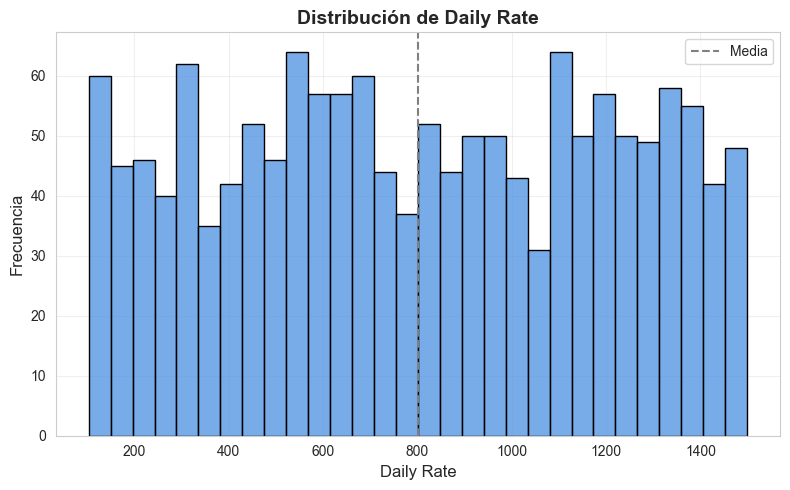

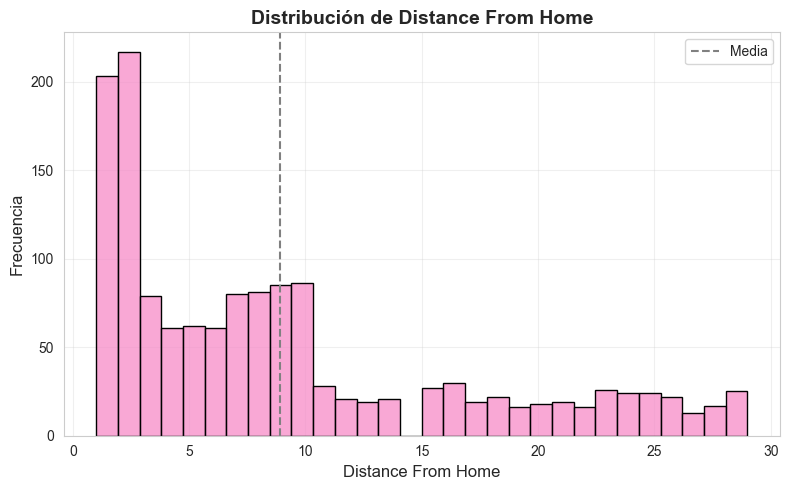

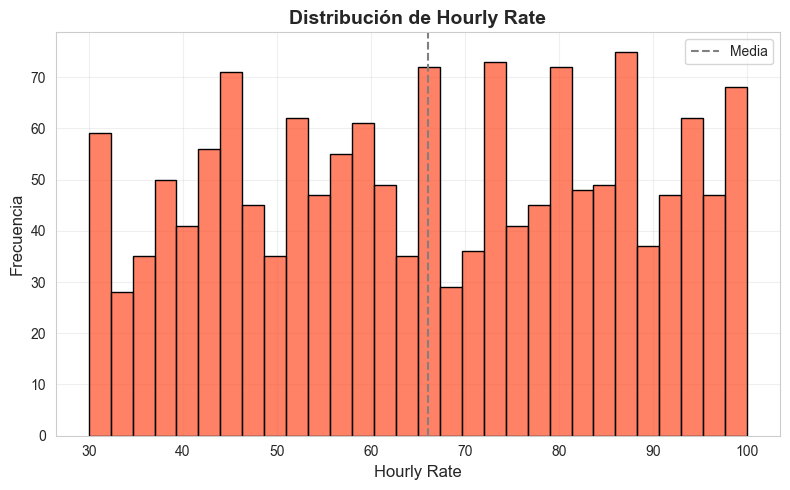

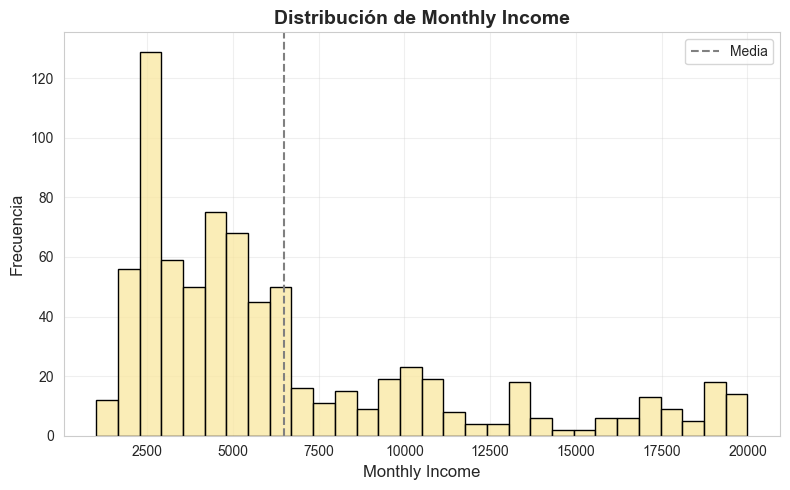

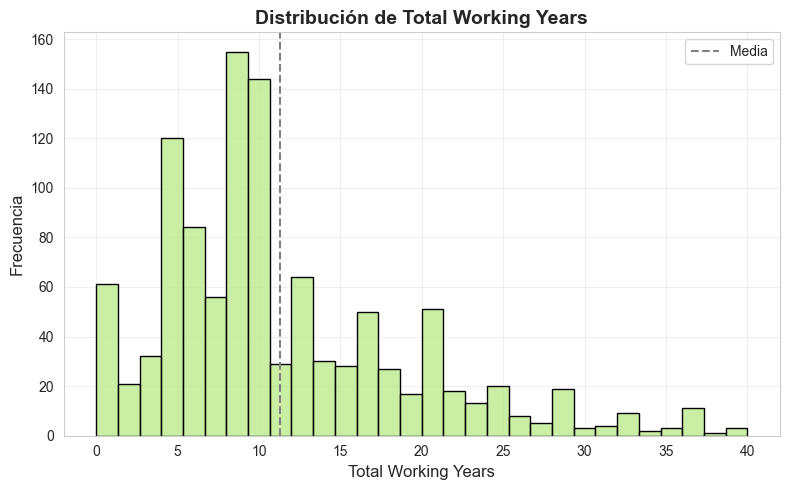

In [1124]:

sns.set_style('whitegrid')

# Paleta de colores Datavision
corporate_colors = ['#4A90E2', '#F78BC8', '#FF5733', '#F9E79F', '#B8E986']

# Bucle para crear un histograma para cada columna con nulos
for i, col in enumerate(columnas_nulos):
    plt.figure(figsize=(8, 5))
    
    # Histograma
    sns.histplot(df_talento[col].dropna(), 
                 bins=30, 
                 color=corporate_colors[i % len(corporate_colors)], 
                 edgecolor='black')
    
    # Linea vertical indicando la media
    plt.axvline(df_talento[col].mean(), 
                color='gray', 
                linestyle='--', 
                linewidth=1.5, 
                label='Media')
    
    # Titulo
    titulo = col.replace('_', ' ').title()
    plt.title(f'Distribución de {titulo}', fontsize=14, weight='bold')
    
    # Etiquetas de ejes
    plt.xlabel(titulo, fontsize=12)
    plt.ylabel('Frecuencia', fontsize=12)
    
    # Leyenda 
    plt.legend()
    
    # Grid 
    plt.grid(alpha=0.3)
    
    plt.tight_layout()
    plt.show()

Daily_Rate, Distance_From_Home, Hourly_Rate, Monthly_Income, Total_Working_Years: Tratamiento de Nulos Numéricos 


In [1125]:
df_talento.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1614.0,36.920694,9.102157,18.00,30.00,36.0,43.0,60.0
Daily_Rate,1490.0,802.085235,403.246954,103.00,468.25,798.0,1157.0,1499.0
Distance_From_Home,1422.0,8.892405,7.920281,1.00,2.00,7.0,13.0,29.0
Education,1614.0,2.925031,1.022357,1.00,2.00,3.0,4.0,5.0
Employee_Number,1614.0,733.176772,675.723077,0.01,0.01,594.0,1316.5,2068.0
Environment_Satisfaction,1614.0,2.692069,1.107926,1.00,2.00,3.0,4.0,4.0
Hourly_Rate,1530.0,66.028105,20.185954,30.00,48.00,66.0,84.0,100.0
Job_Involvement,1614.0,2.739777,0.711567,1.00,2.00,3.0,3.0,4.0
Job_Level,1614.0,2.068154,1.101344,1.00,1.00,2.0,3.0,5.0
Job_Satisfaction,1614.0,2.738538,1.106163,1.00,2.00,3.0,4.0,4.0


In [1126]:
imputer_iter = IterativeImputer(max_iter = 100, random_state = 42)
df_talento[['Daily_Rate','Distance_From_Home', 'Hourly_Rate','Total_Working_Years']] = imputer_iter.fit_transform(df_talento[['Daily_Rate','Distance_From_Home', 'Hourly_Rate', 'Total_Working_Years']])

In [1127]:
df_talento.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1614.0,36.920694,9.102157,18.00,30.00,36.000000,43.00000,60.0
Daily_Rate,1614.0,802.086107,387.437156,103.00,498.00,802.083058,1130.75000,1499.0
Distance_From_Home,1614.0,8.892188,7.433969,1.00,2.00,8.000000,11.00000,29.0
Education,1614.0,2.925031,1.022357,1.00,2.00,3.000000,4.00000,5.0
Employee_Number,1614.0,733.176772,675.723077,0.01,0.01,594.000000,1316.50000,2068.0
Environment_Satisfaction,1614.0,2.692069,1.107926,1.00,2.00,3.000000,4.00000,4.0
Hourly_Rate,1614.0,66.029967,19.653477,30.00,49.00,66.000000,83.00000,100.0
Job_Involvement,1614.0,2.739777,0.711567,1.00,2.00,3.000000,3.00000,4.0
Job_Level,1614.0,2.068154,1.101344,1.00,1.00,2.000000,3.00000,5.0
Job_Satisfaction,1614.0,2.738538,1.106163,1.00,2.00,3.000000,4.00000,4.0


In [1128]:
imputer_iter = IterativeImputer(max_iter = 200, random_state = 42)
df_talento['Monthly_Income'] = imputer_iter.fit_transform(df_talento[['Monthly_Income']])

In [1129]:
df_talento.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1614 entries, 0 to 1613
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         1614 non-null   int64  
 1   Attrition                   1614 non-null   object 
 2   Business_Travel             1614 non-null   object 
 3   Daily_Rate                  1614 non-null   float64
 4   Department                  1614 non-null   object 
 5   Distance_From_Home          1614 non-null   float64
 6   Education                   1614 non-null   int64  
 7   Education_Field             1614 non-null   object 
 8   Employee_Number             1614 non-null   float64
 9   Environment_Satisfaction    1614 non-null   int64  
 10  Gender                      1614 non-null   object 
 11  Hourly_Rate                 1614 non-null   float64
 12  Job_Involvement             1614 non-null   int64  
 13  Job_Level                   1614 non-n

In [1130]:
df_talento.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1614.0,36.920694,9.102157,18.00,30.00,36.000000,43.000000,60.0
Daily_Rate,1614.0,802.086107,387.437156,103.00,498.00,802.083058,1130.750000,1499.0
Distance_From_Home,1614.0,8.892188,7.433969,1.00,2.00,8.000000,11.000000,29.0
Education,1614.0,2.925031,1.022357,1.00,2.00,3.000000,4.000000,5.0
Employee_Number,1614.0,733.176772,675.723077,0.01,0.01,594.000000,1316.500000,2068.0
Environment_Satisfaction,1614.0,2.692069,1.107926,1.00,2.00,3.000000,4.000000,4.0
Hourly_Rate,1614.0,66.029967,19.653477,30.00,49.00,66.000000,83.000000,100.0
Job_Involvement,1614.0,2.739777,0.711567,1.00,2.00,3.000000,3.000000,4.0
Job_Level,1614.0,2.068154,1.101344,1.00,1.00,2.000000,3.000000,5.0
Job_Satisfaction,1614.0,2.738538,1.106163,1.00,2.00,3.000000,4.000000,4.0


In [1131]:
df_talento.isnull().sum()

Age                           0
Attrition                     0
Business_Travel               0
Daily_Rate                    0
Department                    0
Distance_From_Home            0
Education                     0
Education_Field               0
Employee_Number               0
Environment_Satisfaction      0
Gender                        0
Hourly_Rate                   0
Job_Involvement               0
Job_Level                     0
Job_Role                      0
Job_Satisfaction              0
Marital_Status                0
Monthly_Income                0
Monthly_Rate                  0
Num_Companies_Worked          0
Over_Time                     0
Percent_Salary_Hike           0
Performance_Rating            0
Relationship_Satisfaction     0
Stock_Option_Level            0
Total_Working_Years           0
Training_Times_Last_Year      0
Work_Life_Balance             0
Years_At_Company              0
Years_Since_Last_Promotion    0
Years_With_Current_Manager    0
Role_Dep

Visualización

In [1132]:
# Guardamos CSV limpio
df_talento.to_csv("df_talento_limpio.csv", index=False)

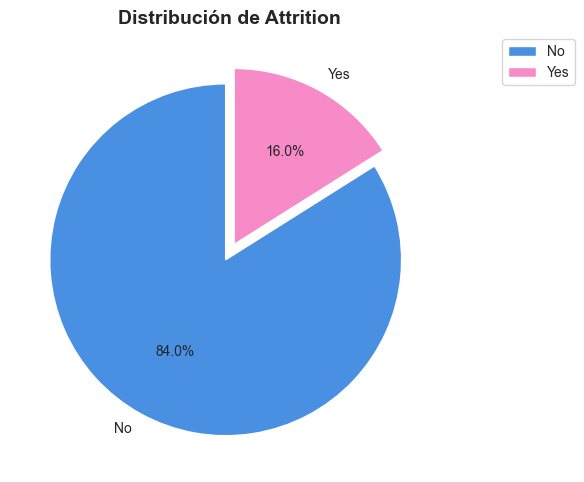

In [1133]:
# Contamos valores de Attrition
attrition_counts = df_talento["Attrition"].value_counts()

# Colores corporativos 
colors = ['#4A90E2', '#F78BC8']

# Gráfico
plt.figure(figsize=(6,6))
plt.pie(attrition_counts, 
        labels=attrition_counts.index, 
        autopct='%1.1f%%',  # Mostrar porcentaje
        startangle=90, 
        explode=[0.05]*len(attrition_counts),  # Separar todas las secciones
        colors=colors[:len(attrition_counts)], 
        wedgeprops={'edgecolor': 'white'})  # Borde blanco

# Título y leyenda
plt.title('Distribución de Attrition', fontsize=14, weight='bold')
plt.legend(attrition_counts.index, loc='upper right', bbox_to_anchor=(1.3, 1))

plt.tight_layout()
plt.show()

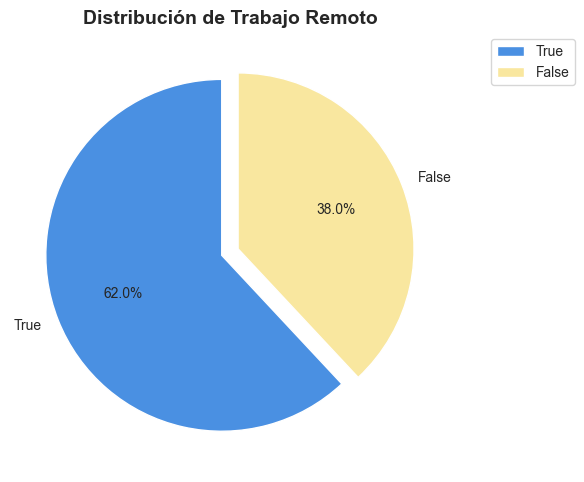

In [1134]:
# Contar valores de Remote Work
remote_counts = df_talento["Remote_Work"].value_counts()

# Colores
colors = ['#4A90E2', '#F9E79F']

# Gráfico 
plt.figure(figsize=(6,6))
plt.pie(remote_counts, 
        labels=remote_counts.index, 
        autopct='%1.1f%%', 
        startangle=90, 
        explode=[0.05]*len(remote_counts), 
        colors=colors[:len(remote_counts)], 
        wedgeprops={'edgecolor': 'white'})

plt.title('Distribución de Trabajo Remoto', fontsize=14, weight='bold')
plt.legend(remote_counts.index, loc='upper right', bbox_to_anchor=(1.3, 1))

plt.tight_layout()
plt.show()

In [1135]:
viajes_empleados = df_talento.groupby('Attrition')['Business_Travel'].count().reset_index()
viajes_empleados

,Attrition,Business_Travel
0,No,1355
1,Yes,259


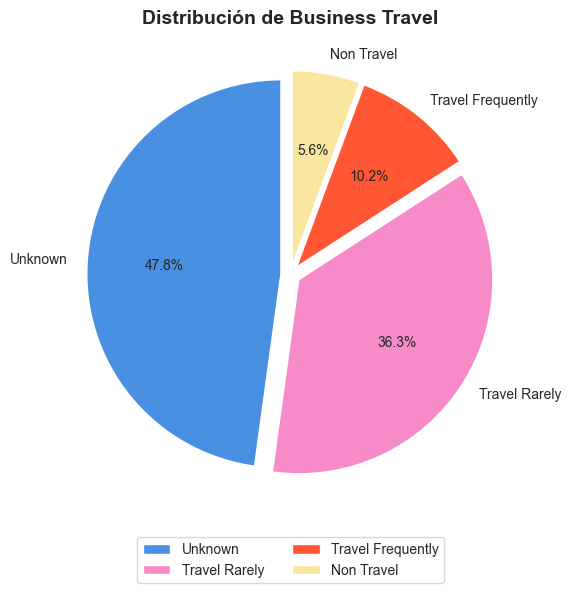

In [1136]:
# Contar valores de Business Travel
travel_counts = df_talento["Business_Travel"].value_counts()

# Colores 
colors = ['#4A90E2','#F78BC8', '#FF5733', '#F9E79F']
#'#FF5733', '#F78BC8', '#4A90E2'
# Gráfico
plt.figure(figsize=(6,6))
plt.pie(travel_counts, 
        labels=travel_counts.index, 
        autopct='%1.1f%%', 
        startangle=90, 
        explode=[0.05]*len(travel_counts),  # Explode ajustado 
        colors=colors[:len(travel_counts)], 
        wedgeprops={'edgecolor': 'white'})

plt.title('Distribución de Business Travel', fontsize=14, weight='bold')
plt.legend(travel_counts.index, loc='lower center', bbox_to_anchor=(0.5, -0.15), ncol=2)

plt.tight_layout()
plt.show()

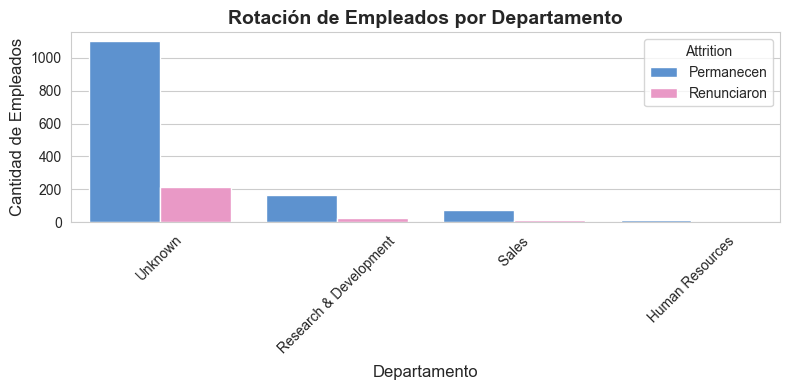

In [1137]:

plt.figure(figsize=(8, 4))

# Countplot con hue para comparar empleados que permanecen vs renuncian
ax = sns.countplot(data=df_talento, 
                   x="Department", 
                   hue="Attrition", 
                   palette=["#4A90E2", "#F78BC8"])  # Colores corporativos (Azul y Rosa)

# Título y etiquetas
plt.title("Rotación de Empleados por Departamento", fontsize=14, weight='bold')
plt.xlabel("Departamento", fontsize=12)
plt.ylabel("Cantidad de Empleados", fontsize=12)

# Rotar etiquetas del eje X para mejor visibilidad
plt.xticks(rotation=45)

# Leyenda
plt.legend(title="Attrition", labels=["Permanecen", "Renunciaron"])

plt.tight_layout()
plt.show()


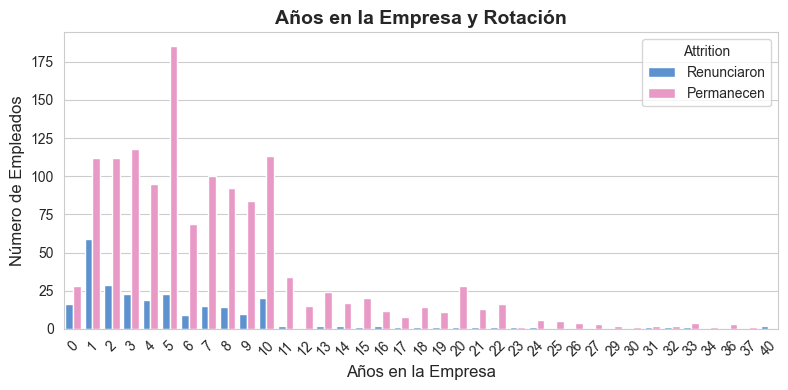

In [1138]:


# Crear figura y definir tamaño
plt.figure(figsize=(8, 4))

# Crear countplot para mostrar la relación entre años en la empresa y rotación
ax = sns.countplot(data=df_talento, 
                   x="Years_At_Company", 
                   hue="Attrition", 
                   palette=["#4A90E2", "#F78BC8"])  # Colores corporativos Datavision

# Título y etiquetas con fuentes más grandes
plt.title("Años en la Empresa y Rotación", fontsize=14, weight='bold')
plt.xlabel("Años en la Empresa", fontsize=12)
plt.ylabel("Número de Empleados", fontsize=12)

# Rotar etiquetas del eje X
plt.xticks(rotation=45)

# Personalizar leyenda
plt.legend(title="Attrition", labels=["Renunciaron", "Permanecen"])

plt.tight_layout()
plt.show()


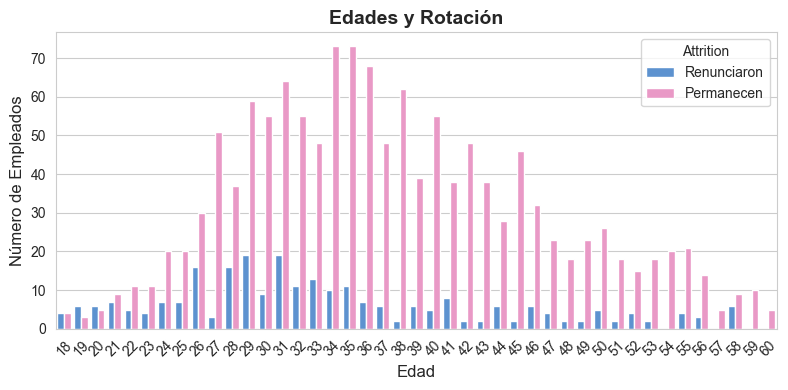

In [1139]:


# Crear figura y definir tamaño
plt.figure(figsize=(8, 4))

# Crear countplot para mostrar la relación entre edad y rotación
ax = sns.countplot(data=df_talento, 
                   x="Age", 
                   hue="Attrition", 
                   palette=["#4A90E2", "#F78BC8"])  # Colores corporativos Datavision

# Título y etiquetas con mejor visualización
plt.title("Edades y Rotación", fontsize=14, weight='bold')
plt.xlabel("Edad", fontsize=12)
plt.ylabel("Número de Empleados", fontsize=12)

# Rotar etiquetas del eje X 
plt.xticks(rotation=45)

# Personalizar leyenda
plt.legend(title="Attrition", labels=["Renunciaron", "Permanecen"])

plt.tight_layout()
plt.show()


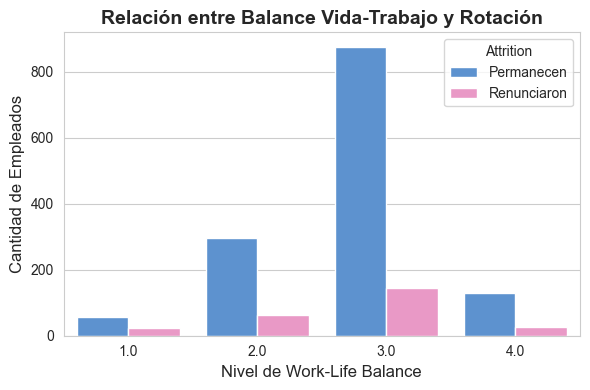

In [1140]:

# Crear figura y definir tamaño
plt.figure(figsize=(6, 4))

# Crear countplot con hue para comparar rotación según Work-Life Balance
sns.countplot(data=df_talento, 
              x="Work_Life_Balance", 
              hue="Attrition", 
              palette=["#4A90E2", "#F78BC8"])  # Colores corporativos Datavision

# Título y etiquetas
plt.title("Relación entre Balance Vida-Trabajo y Rotación", fontsize=14, weight='bold')
plt.xlabel("Nivel de Work-Life Balance", fontsize=12)
plt.ylabel("Cantidad de Empleados", fontsize=12)

# Personalizar leyenda
plt.legend(title="Attrition", labels=["Permanecen", "Renunciaron"])

plt.tight_layout()
plt.show()


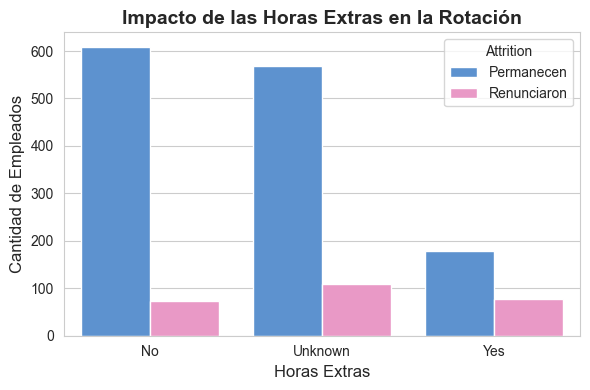

In [1141]:

plt.figure(figsize=(6, 4))

# Crear countplot para comparar rotación según horas extras
sns.countplot(data=df_talento, 
              x="Over_Time", 
              hue="Attrition", 
              palette=["#4A90E2", "#F78BC8"])  # Colores corporativos

# Título y etiquetas
plt.title("Impacto de las Horas Extras en la Rotación", fontsize=14, weight='bold')
plt.xlabel("Horas Extras", fontsize=12)
plt.ylabel("Cantidad de Empleados", fontsize=12)

# Leyenda
plt.legend(title="Attrition", labels=["Permanecen", "Renunciaron"])

plt.tight_layout()
plt.show()


In [1142]:
# Calcular el tamaño de cada combinación de Over_Time y Attrition
group_counts = df_talento.groupby(["Over_Time", "Attrition"]).size()

# Calcular el total por cada categoría de Over_Time
group_totals = df_talento.groupby("Over_Time").size()

# Calcular los porcentajes dividiendo las cuentas por los totales
df_talento_percent = (group_counts / group_totals * 100).reset_index(name="Percentage")


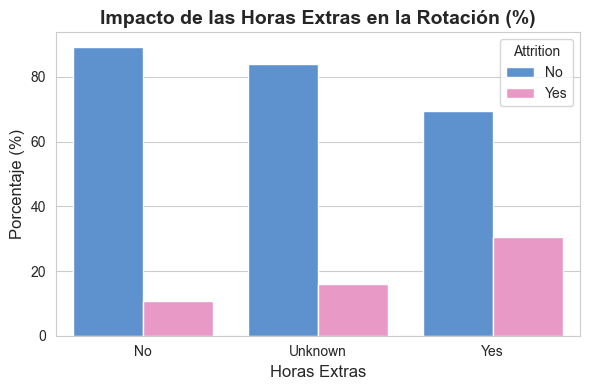

In [1143]:

# Crear figura y tamaño
plt.figure(figsize=(6, 4))

# Crear barplot para mostrar porcentaje de rotación según horas extras
sns.barplot(
    data=df_talento_percent, 
    x="Over_Time", 
    y="Percentage", 
    hue="Attrition", 
    palette=["#4A90E2", "#F78BC8"]  # Colores corporativos Datavision
)

# Título y etiquetas
plt.title("Impacto de las Horas Extras en la Rotación (%)", fontsize=14, weight='bold')
plt.xlabel("Horas Extras", fontsize=12)
plt.ylabel("Porcentaje (%)", fontsize=12)

# Leyenda

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ["Permanecen", "Renunciaron"], title="Attrition")

plt.tight_layout()
plt.show()


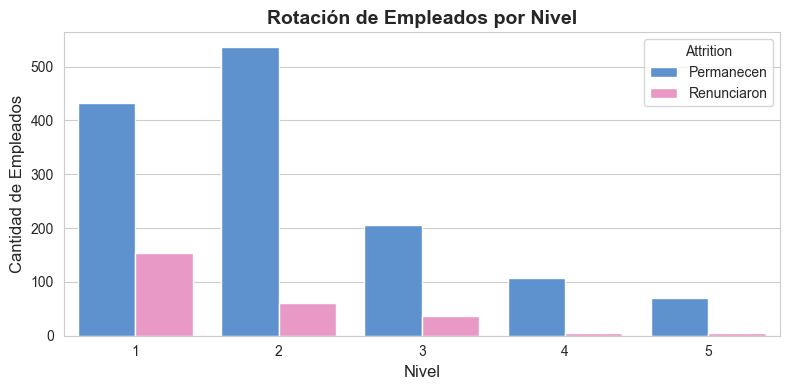

In [1144]:

# Crear figura y definir tamaño
plt.figure(figsize=(8, 4))

# Crear countplot para mostrar la rotación por nivel de puesto
sns.countplot(data=df_talento, 
              x="Job_Level", 
              hue="Attrition", 
              palette=["#4A90E2", "#F78BC8"])  # Colores corporativos Datavision

# Titulo y etiquetas
plt.title("Rotación de Empleados por Nivel", fontsize=14, weight='bold')
plt.xlabel("Nivel", fontsize=12)
plt.ylabel("Cantidad de Empleados", fontsize=12)

# Asegurar que las etiquetas del eje X estén correctamente ajustadas
plt.xticks(rotation=0)

# Leyenda
plt.legend(title="Attrition", labels=["Permanecen", "Renunciaron"])

plt.tight_layout()
plt.show()


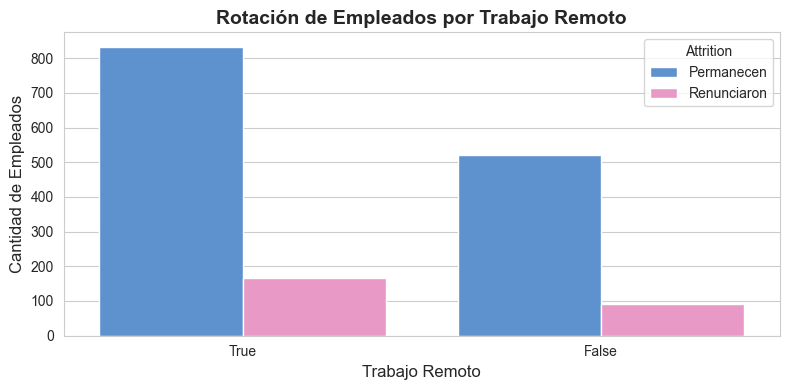

In [1145]:


# Crear figura y definir tamaño
plt.figure(figsize=(8, 4))

# Crear countplot para comparar rotación según trabajo remoto
sns.countplot(data=df_talento, 
              x="Remote_Work", 
              hue="Attrition", 
              palette=["#4A90E2", "#F78BC8"])  # Colores corporativos

# Título y etiquetas
plt.title("Rotación de Empleados por Trabajo Remoto", fontsize=14, weight='bold')
plt.xlabel("Trabajo Remoto", fontsize=12)
plt.ylabel("Cantidad de Empleados", fontsize=12)

plt.xticks(rotation=0)

# Leyenda
plt.legend(title="Attrition", labels=["Permanecen", "Renunciaron"])

plt.tight_layout()
plt.show()


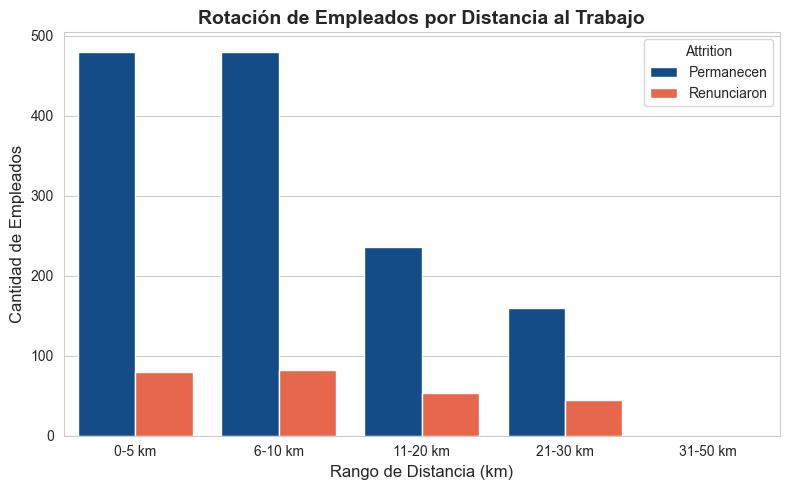

In [1146]:
# Crear una nueva columna con rangos de distancia
bins = [0, 5, 10, 20, 30, 50]  # Puedes ajustar según los datos
labels = ['0-5 km', '6-10 km', '11-20 km', '21-30 km', '31-50 km']

df_talento['Rango_Distancia'] = pd.cut(df_talento['Distance_From_Home'], bins=bins, labels=labels, right=False)


plt.figure(figsize=(8, 5))

# Crear countplot con rangos agrupados
sns.countplot(data=df_talento, 
              x="Rango_Distancia", 
              hue="Attrition", 
              palette=["#004C99", "#FF5733"])  # Colores corporativos con contraste

# Títulos y etiquetas
plt.title("Rotación de Empleados por Distancia al Trabajo", fontsize=14, weight='bold')
plt.xlabel("Rango de Distancia (km)", fontsize=12)
plt.ylabel("Cantidad de Empleados", fontsize=12)

# Legenda 
plt.legend(title="Attrition", labels=["Permanecen", "Renunciaron"])

plt.tight_layout()
plt.show()


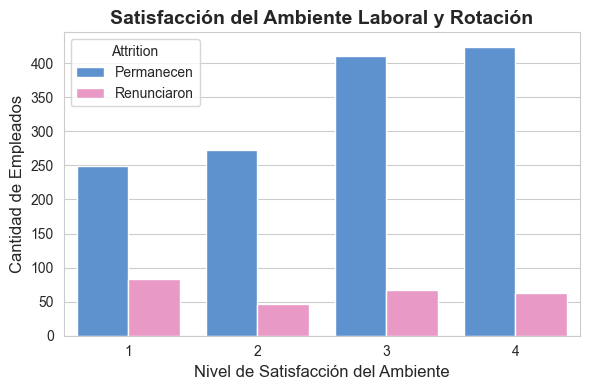

In [1147]:

# Crear figura y definir tamaño
plt.figure(figsize=(6, 4))

# Crear countplot para comparar satisfacción ambiental y rotación
sns.countplot(data=df_talento, 
              x="Environment_Satisfaction", 
              hue="Attrition", 
              palette=["#4A90E2", "#F78BC8"])  # Colores 

# Título y etiquetas
plt.title("Satisfacción del Ambiente Laboral y Rotación", fontsize=14, weight='bold')
plt.xlabel("Nivel de Satisfacción del Ambiente", fontsize=12)
plt.ylabel("Cantidad de Empleados", fontsize=12)

# Leyenda
plt.legend(title="Attrition", labels=["Permanecen", "Renunciaron"])

plt.tight_layout()
plt.show()


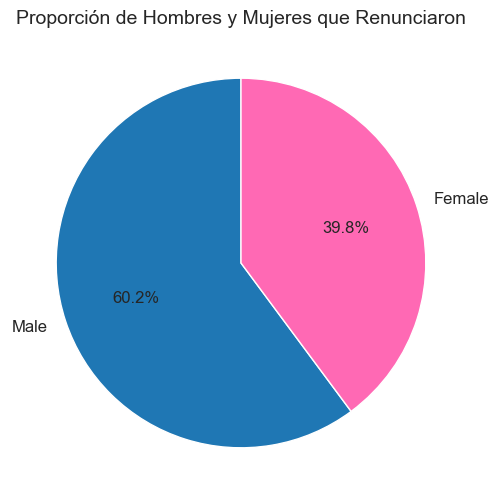

In [1148]:
# Contar la cantidad de hombres y mujeres que renunciaron
gender_counts_t = df_talento["Gender"].value_counts()

# Colores y etiquetas
colors = ["#1f77b4", "#ff69b4"]  # Azul para hombres, rosa para mujeres
labels = gender_counts_t.index  # "Male" y "Female"

# Crear la figura
plt.figure(figsize=(6, 6))
plt.pie(gender_counts_t, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90, 
        wedgeprops={'edgecolor': 'white'}, textprops={'fontsize': 12})

# Título
plt.title("Proporción de Hombres y Mujeres que Renunciaron", fontsize=14)

# Mostrar el gráfico
plt.show()

In [1149]:
df_corr = df_talento.select_dtypes(include=['number']).corr()

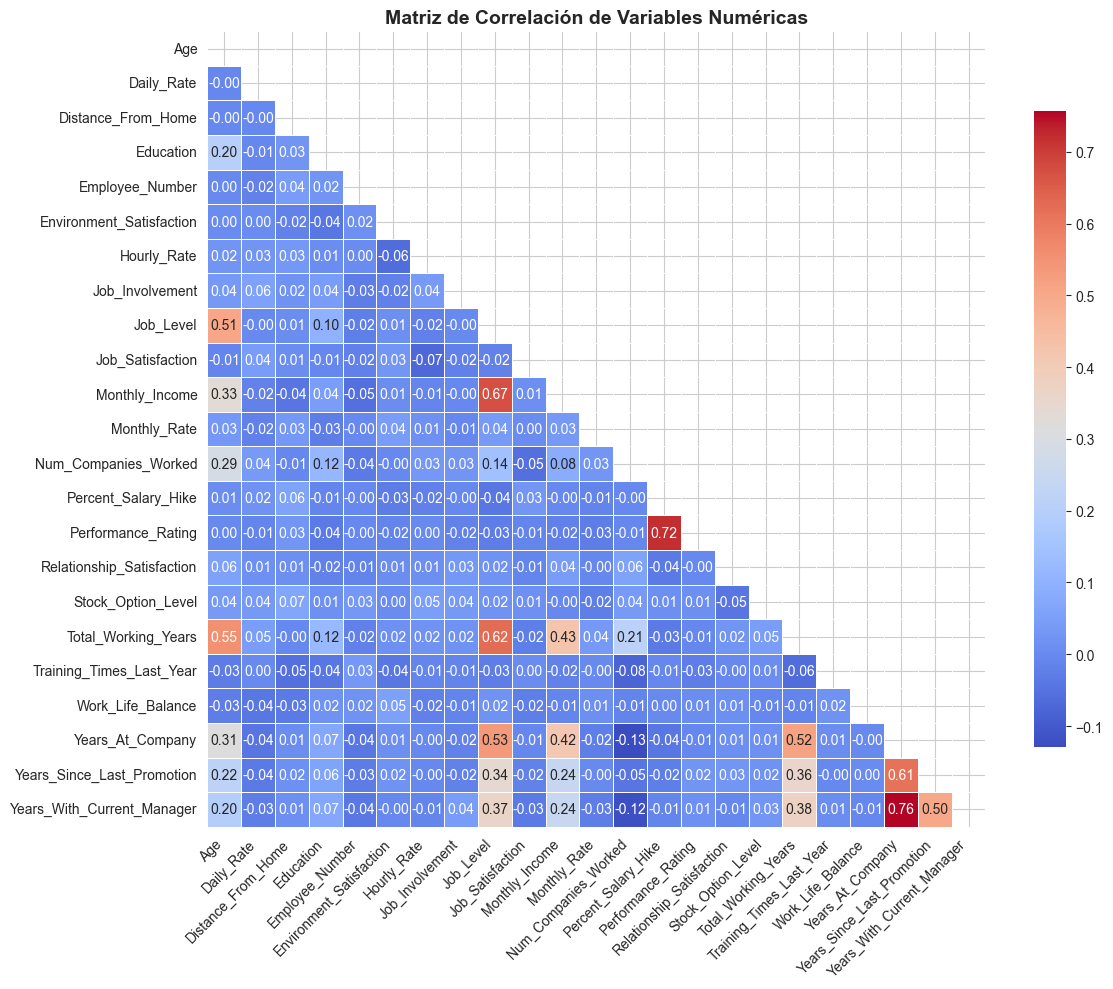

In [1150]:

plt.figure(figsize=(12, 10)) 

# Máscara 
mask = np.triu(np.ones_like(df_corr, dtype=bool))

# Heatmap
sns.heatmap(df_corr, 
            mask=mask, 
            cmap='coolwarm', 
            annot=True, 
            fmt='.2f',  # Dos decimales
            annot_kws={"size":10},  # tamaño de los números
            linewidths=0.5, 
            cbar_kws={"shrink": 0.8})

# Nombres de las etiquetas
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# Título 
plt.title("Matriz de Correlación de Variables Numéricas", fontsize=14, weight='bold')

plt.tight_layout()
plt.show()

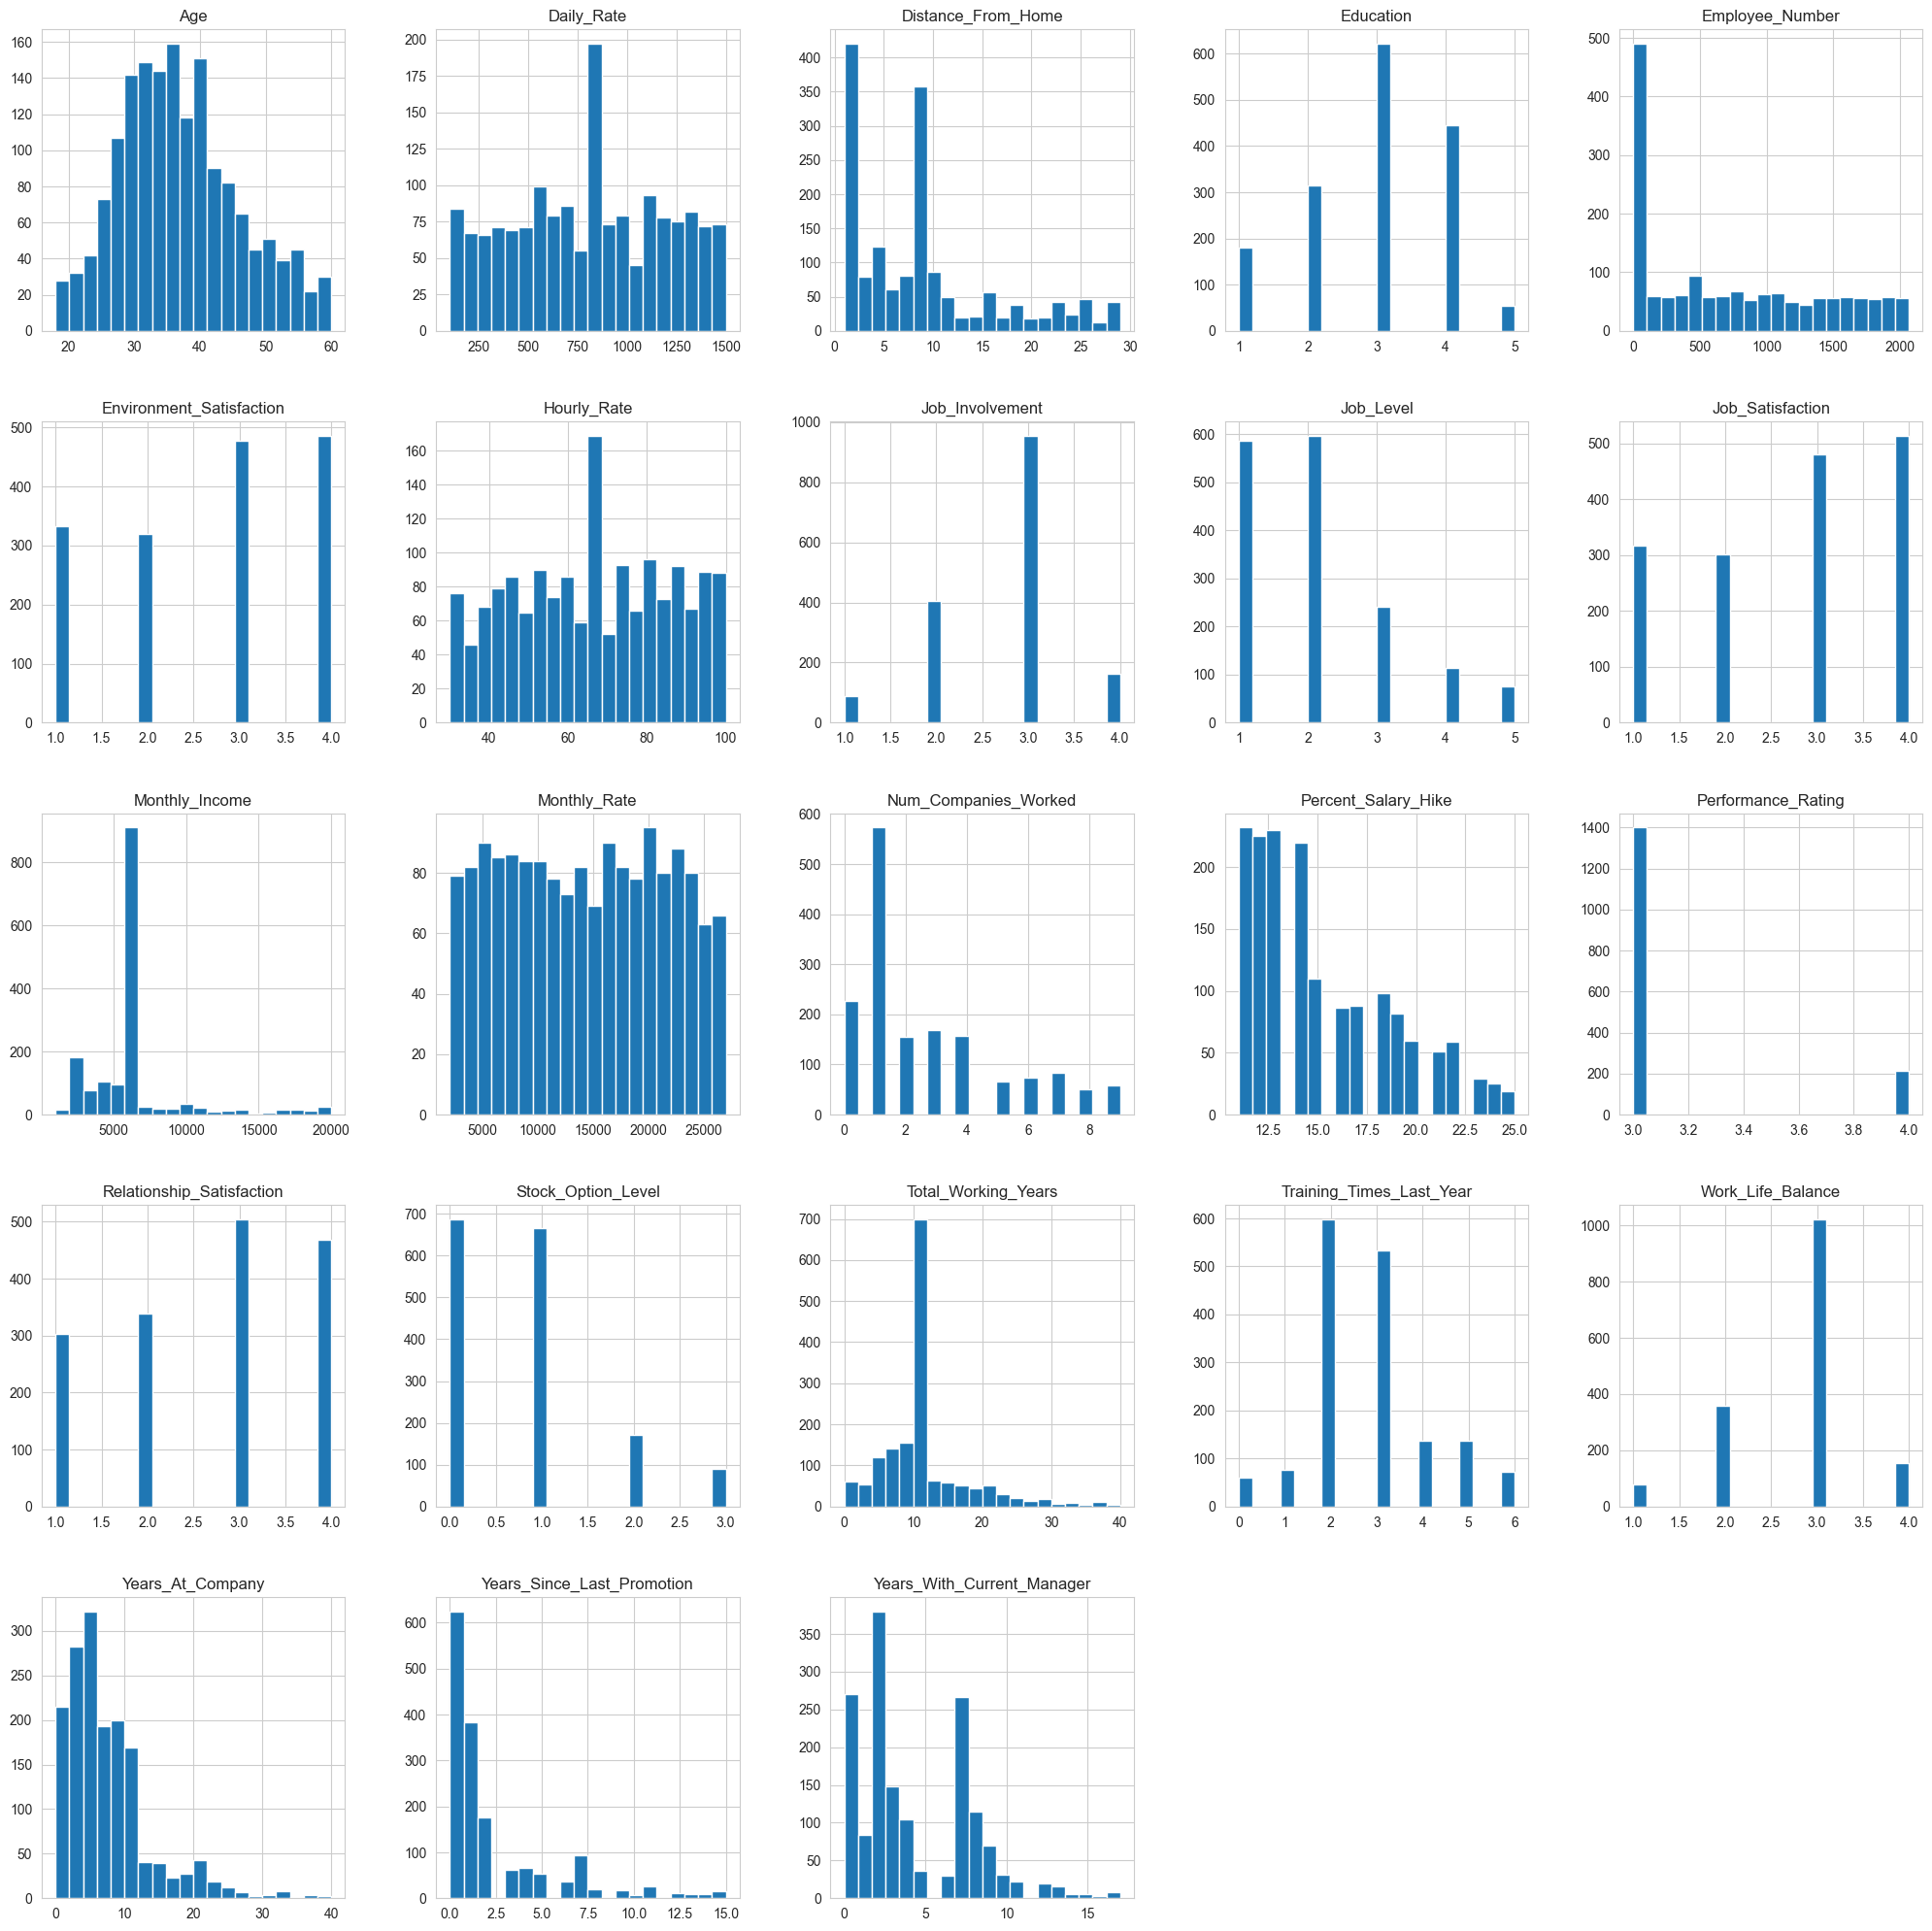

In [1151]:
# Histogramas de todas las variables numéricas del df
df_talento.hist(bins=20, figsize=(25,25))
plt.show()

In [1152]:
salario_medio = df_talento.groupby('Attrition')['Monthly_Income'].mean().reset_index().round(2)
salario_medio

,Attrition,Monthly_Income
0,No,6636.59
1,Yes,5646.36


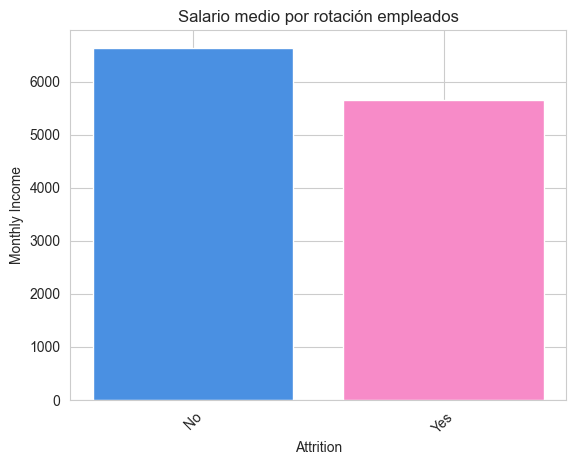

In [1176]:
plt.bar(salario_medio['Attrition'], salario_medio['Monthly_Income'], color=["#4A90E2", "#F78BC8"])
plt.xlabel('Attrition')
plt.ylabel('Monthly Income')
plt.title('Salario medio por rotación empleados')
plt.xticks(rotation=45)
plt.show()

C:\Users\famil\AppData\Local\Temp\ipykernel_28260\77713134.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_talento,


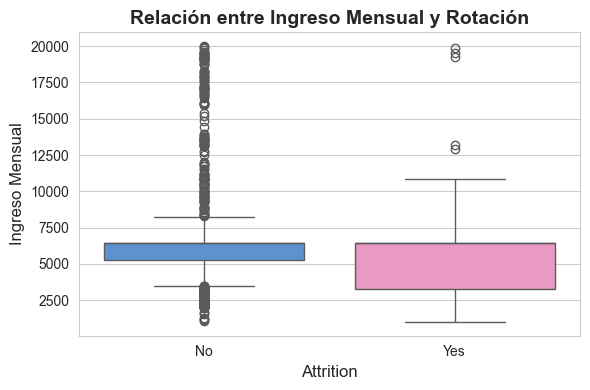

In [1153]:
# Crear figura y definir tamaño
plt.figure(figsize=(6, 4))

# Boxplot para comparar ingreso mensual según rotación
sns.boxplot(data=df_talento, 
            x="Attrition", 
            y="Monthly_Income", 
            palette=["#4A90E2", "#F78BC8"])  # Colores 

# Título y etiquetas
plt.title("Relación entre Ingreso Mensual y Rotación", fontsize=14, weight='bold')
plt.xlabel("Attrition", fontsize=12)
plt.ylabel("Ingreso Mensual", fontsize=12)

plt.tight_layout()
plt.show()


Hacemos un nuevo df con la información de los empleados que se han marchado. 

In [1154]:
# Crear la máscara
mascara = df_talento['Attrition'] == 'Yes'

# Aplicar la máscara para ver solo los empleados que han dejado la empresa
df_talento_filtrado = df_talento[mascara]

# O directamente en una línea:
df_talento_filtrado = df_talento[df_talento['Attrition'] == 'Yes']

df_talento_filtrado.head()

,Age,Attrition,Business_Travel,Daily_Rate,Department,Distance_From_Home,Education,Education_Field,Employee_Number,Environment_Satisfaction,Gender,Hourly_Rate,Job_Involvement,Job_Level,Job_Role,Job_Satisfaction,Marital_Status,Monthly_Income,Monthly_Rate,Num_Companies_Worked,Over_Time,Percent_Salary_Hike,Performance_Rating,Relationship_Satisfaction,Stock_Option_Level,Total_Working_Years,Training_Times_Last_Year,Work_Life_Balance,Years_At_Company,Years_Since_Last_Promotion,Years_With_Current_Manager,Role_Department,Remote_Work,Rango_Distancia
13,41,Yes,Travel Rarely,1360.0,Unknown,12.0,3,Unknown,58.00,2,Female,49.0,3,5,Research Director,3,Married,19545.000000,16280,1,No,12,3.0,4,0,11.704564,0,3.0,22,15,8,Unknown,False,11-20 km
16,58,Yes,Travel Rarely,286.0,Unknown,2.0,4,Unknown,825.00,4,Male,31.0,3,5,Research Director,2,Single,19246.000000,25761,7,Yes,12,3.0,4,0,40.000000,2,3.0,31,13,8,Unknown,False,0-5 km
26,52,Yes,Unknown,266.0,Unknown,2.0,1,Unknown,0.01,1,Female,57.0,1,5,Manager,4,Married,19845.000000,25846,1,No,15,3.0,4,1,33.000000,3,3.0,32,6,9,Unknown,True,0-5 km
43,36,Yes,Travel Rarely,885.0,Unknown,16.0,4,Unknown,1042.00,3,Female,43.0,4,1,Laboratory Technician,1,Single,6477.686122,8269,1,Unknown,16,3.0,3,0,18.000000,1,3.0,17,15,14,Unknown,True,11-20 km
52,35,Yes,Travel Rarely,737.0,Unknown,10.0,3,Medical,0.01,4,Male,55.0,2,3,Sales Executive,1,Married,10306.000000,21530,9,Unknown,17,3.0,3,0,15.000000,3,3.0,13,6,0,Unknown,False,11-20 km


In [1155]:
df_talento_filtrado.shape

(259, 34)

In [1156]:
viajes_empleados = df_talento_filtrado.groupby('Attrition')['Monthly_Income'].mean().reset_index().round(2)
salario_medio

,Attrition,Monthly_Income
0,No,6636.59
1,Yes,5646.36


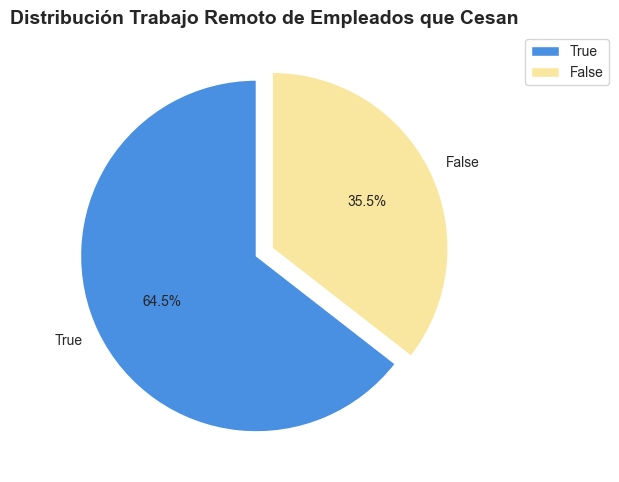

In [1157]:
# Contar valores de Remote Work
remote_counts_filtrado = df_talento_filtrado["Remote_Work"].value_counts()

# Colores
colors = ['#4A90E2', '#F9E79F']

# Gráfico 
plt.figure(figsize=(6,6))
plt.pie(remote_counts_filtrado, 
        labels=remote_counts_filtrado.index, 
        autopct='%1.1f%%', 
        startangle=90, 
        explode=[0.05]*len(remote_counts_filtrado), 
        colors=colors[:len(remote_counts_filtrado)], 
        wedgeprops={'edgecolor': 'white'})

plt.title('Distribución Trabajo Remoto de Empleados que Cesan', fontsize=14, weight='bold')
plt.legend(remote_counts_filtrado.index, loc='upper right', bbox_to_anchor=(1.3, 1))

plt.tight_layout()
plt.show()

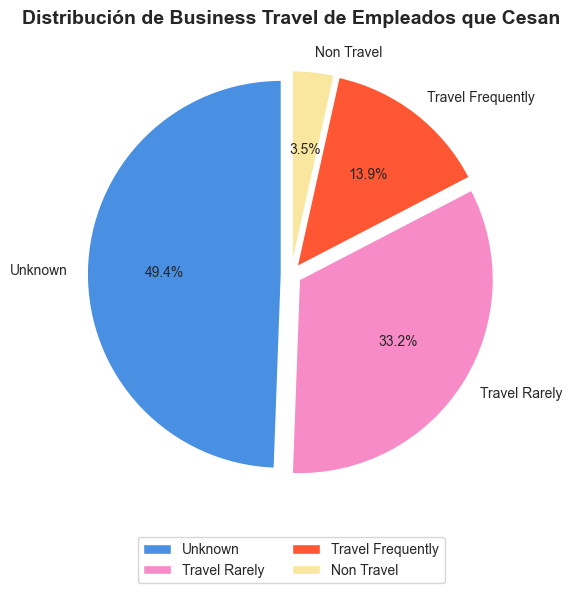

In [1158]:
# Contar valores de Business Travel
travel_counts_filtrado = df_talento_filtrado["Business_Travel"].value_counts()

# Colores 
colors = ['#4A90E2','#F78BC8', '#FF5733', '#F9E79F']
#'#FF5733', '#F78BC8', '#4A90E2'
# Gráfico
plt.figure(figsize=(6,6))
plt.pie(travel_counts_filtrado, 
        labels=travel_counts_filtrado.index, 
        autopct='%1.1f%%', 
        startangle=90, 
        explode=[0.05]*len(travel_counts_filtrado),  # Explode ajustado 
        colors=colors[:len(travel_counts_filtrado)], 
        wedgeprops={'edgecolor': 'white'})

plt.title('Distribución de Business Travel de Empleados que Cesan', fontsize=14, weight='bold')
plt.legend(travel_counts_filtrado.index, loc='lower center', bbox_to_anchor=(0.5, -0.15), ncol=2)

plt.tight_layout()
plt.show()

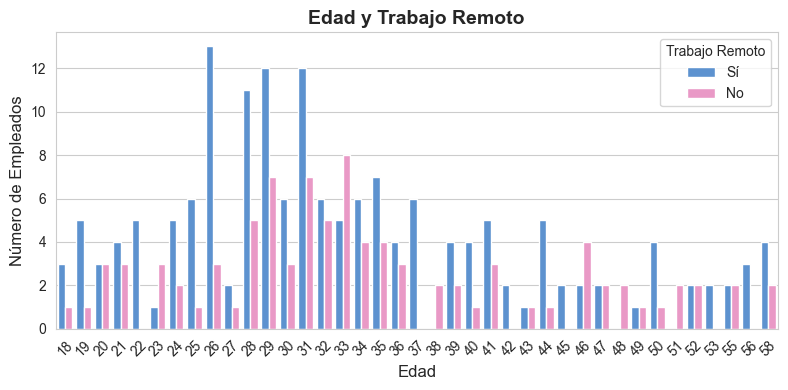

In [1159]:
# Crear figura y definir tamaño
plt.figure(figsize=(8, 4))

# Crear countplot para comparar edad según trabajo remoto
sns.countplot(data=df_talento_filtrado, 
              x="Age", 
              hue="Remote_Work", 
              palette=["#4A90E2", "#F78BC8"]) 

# Título y etiquetas
plt.title("Edad y Trabajo Remoto", fontsize=14, weight='bold')
plt.xlabel("Edad", fontsize=12)
plt.ylabel("Número de Empleados", fontsize=12)

# Rotar etiquetas para mejor visibilidad
plt.xticks(rotation=45)

# Leyenda
plt.legend(title="Trabajo Remoto", labels=["Sí", "No"])

plt.tight_layout()
plt.show()

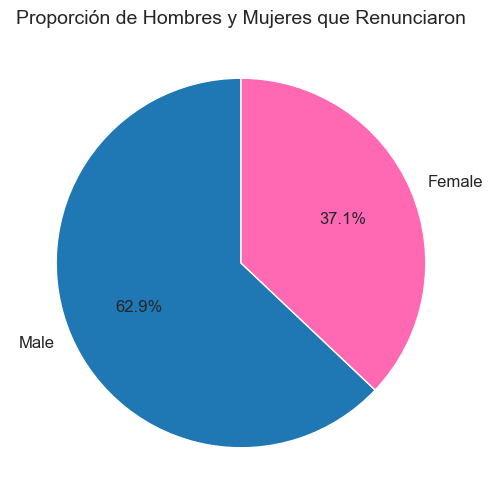

In [1160]:
# Contar la cantidad de hombres y mujeres que renunciaron
gender_counts = df_talento_filtrado["Gender"].value_counts()

# Colores y etiquetas
colors = ["#1f77b4", "#ff69b4"]  # Azul para hombres, rosa para mujeres
labels = gender_counts.index  # "Male" y "Female"

# Crear la figura
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90, 
        wedgeprops={'edgecolor': 'white'}, textprops={'fontsize': 12})

# Título
plt.title("Proporción de Hombres y Mujeres que Renunciaron", fontsize=14)

# Mostrar el gráfico
plt.show()


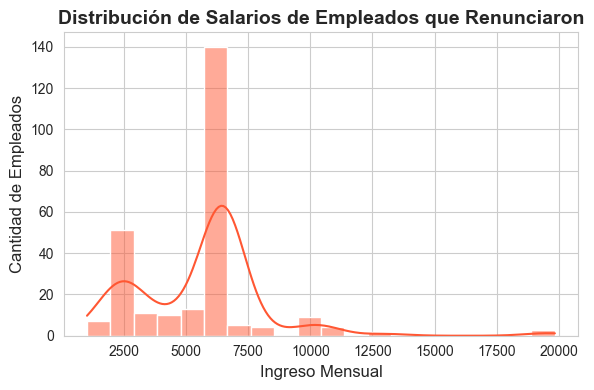

In [1161]:

plt.figure(figsize=(6, 4))

# Histograma con KDE para visualizar distribución de salarios
sns.histplot(df_talento_filtrado["Monthly_Income"], 
             bins=20, 
             kde=True, 
             color="#FF5733")  

# Titulo y etiquetas
plt.title("Distribución de Salarios de Empleados que Renunciaron", fontsize=14, weight='bold')
plt.xlabel("Ingreso Mensual", fontsize=12)
plt.ylabel("Cantidad de Empleados", fontsize=12)

plt.tight_layout()
plt.show()


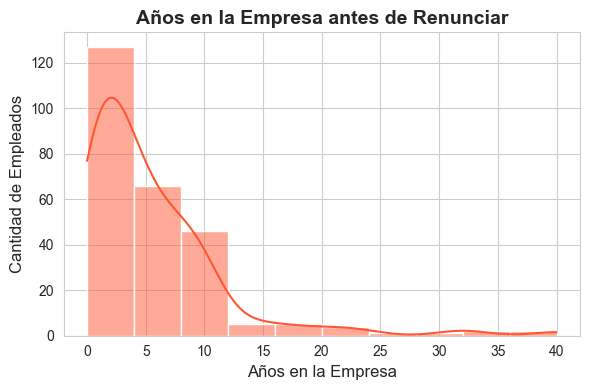

In [1162]:
# Crear figura y definir tamaño
plt.figure(figsize=(6, 4))

# Histograma con KDE para mostrar distribución del tiempo en la empresa antes de renunciar
sns.histplot(df_talento_filtrado["Years_At_Company"], 
             bins=10, 
             kde=True, 
             color="#FF5733") 

# Título y etiquetas
plt.title("Años en la Empresa antes de Renunciar", fontsize=14, weight='bold')
plt.xlabel("Años en la Empresa", fontsize=12)
plt.ylabel("Cantidad de Empleados", fontsize=12)

plt.tight_layout()
plt.show()


In [1163]:
df_talento_filtrado.head()

,Age,Attrition,Business_Travel,Daily_Rate,Department,Distance_From_Home,Education,Education_Field,Employee_Number,Environment_Satisfaction,Gender,Hourly_Rate,Job_Involvement,Job_Level,Job_Role,Job_Satisfaction,Marital_Status,Monthly_Income,Monthly_Rate,Num_Companies_Worked,Over_Time,Percent_Salary_Hike,Performance_Rating,Relationship_Satisfaction,Stock_Option_Level,Total_Working_Years,Training_Times_Last_Year,Work_Life_Balance,Years_At_Company,Years_Since_Last_Promotion,Years_With_Current_Manager,Role_Department,Remote_Work,Rango_Distancia
13,41,Yes,Travel Rarely,1360.0,Unknown,12.0,3,Unknown,58.00,2,Female,49.0,3,5,Research Director,3,Married,19545.000000,16280,1,No,12,3.0,4,0,11.704564,0,3.0,22,15,8,Unknown,False,11-20 km
16,58,Yes,Travel Rarely,286.0,Unknown,2.0,4,Unknown,825.00,4,Male,31.0,3,5,Research Director,2,Single,19246.000000,25761,7,Yes,12,3.0,4,0,40.000000,2,3.0,31,13,8,Unknown,False,0-5 km
26,52,Yes,Unknown,266.0,Unknown,2.0,1,Unknown,0.01,1,Female,57.0,1,5,Manager,4,Married,19845.000000,25846,1,No,15,3.0,4,1,33.000000,3,3.0,32,6,9,Unknown,True,0-5 km
43,36,Yes,Travel Rarely,885.0,Unknown,16.0,4,Unknown,1042.00,3,Female,43.0,4,1,Laboratory Technician,1,Single,6477.686122,8269,1,Unknown,16,3.0,3,0,18.000000,1,3.0,17,15,14,Unknown,True,11-20 km
52,35,Yes,Travel Rarely,737.0,Unknown,10.0,3,Medical,0.01,4,Male,55.0,2,3,Sales Executive,1,Married,10306.000000,21530,9,Unknown,17,3.0,3,0,15.000000,3,3.0,13,6,0,Unknown,False,11-20 km


In [1164]:
df_filtrado_corr = df_talento_filtrado.select_dtypes(include=['number']).corr()

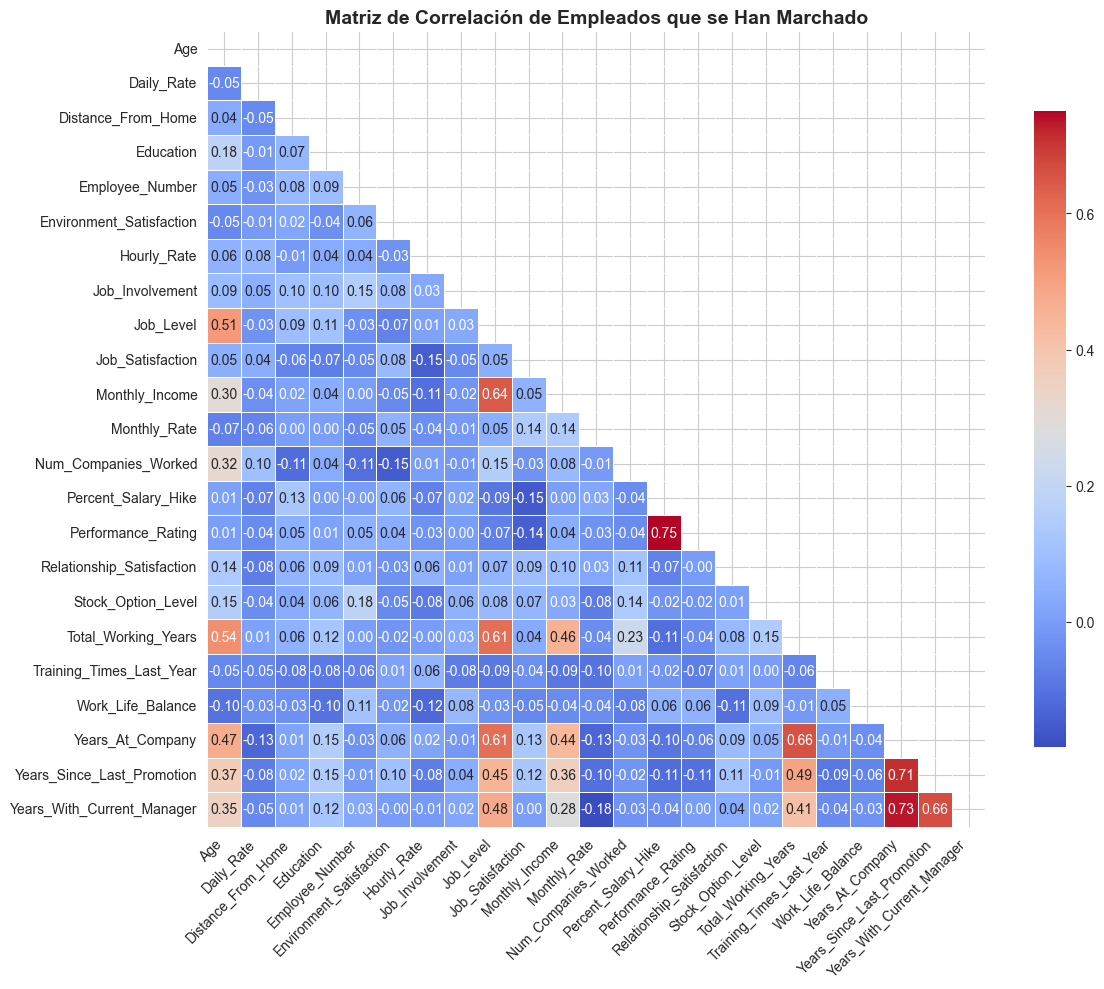

In [1165]:

plt.figure(figsize=(12, 10)) 

# Mascara para mostrar solo mitad superior
mask = np.triu(np.ones_like(df_filtrado_corr, dtype=bool))

# Heatmap
sns.heatmap(df_filtrado_corr, 
            mask=mask, 
            cmap='coolwarm', 
            annot=True,        # Mostrar valores dentro de las celdas
            fmt='.2f',         # Formato decimal
            annot_kws={"size":10},  # Tamaño de los números
            linewidths=0.5, 
            cbar_kws={"shrink": 0.8})  # Barra de color

# Etiquetas
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# Título 
plt.title("Matriz de Correlación de Empleados que se Han Marchado", fontsize=14, weight='bold')

plt.tight_layout()
plt.show()

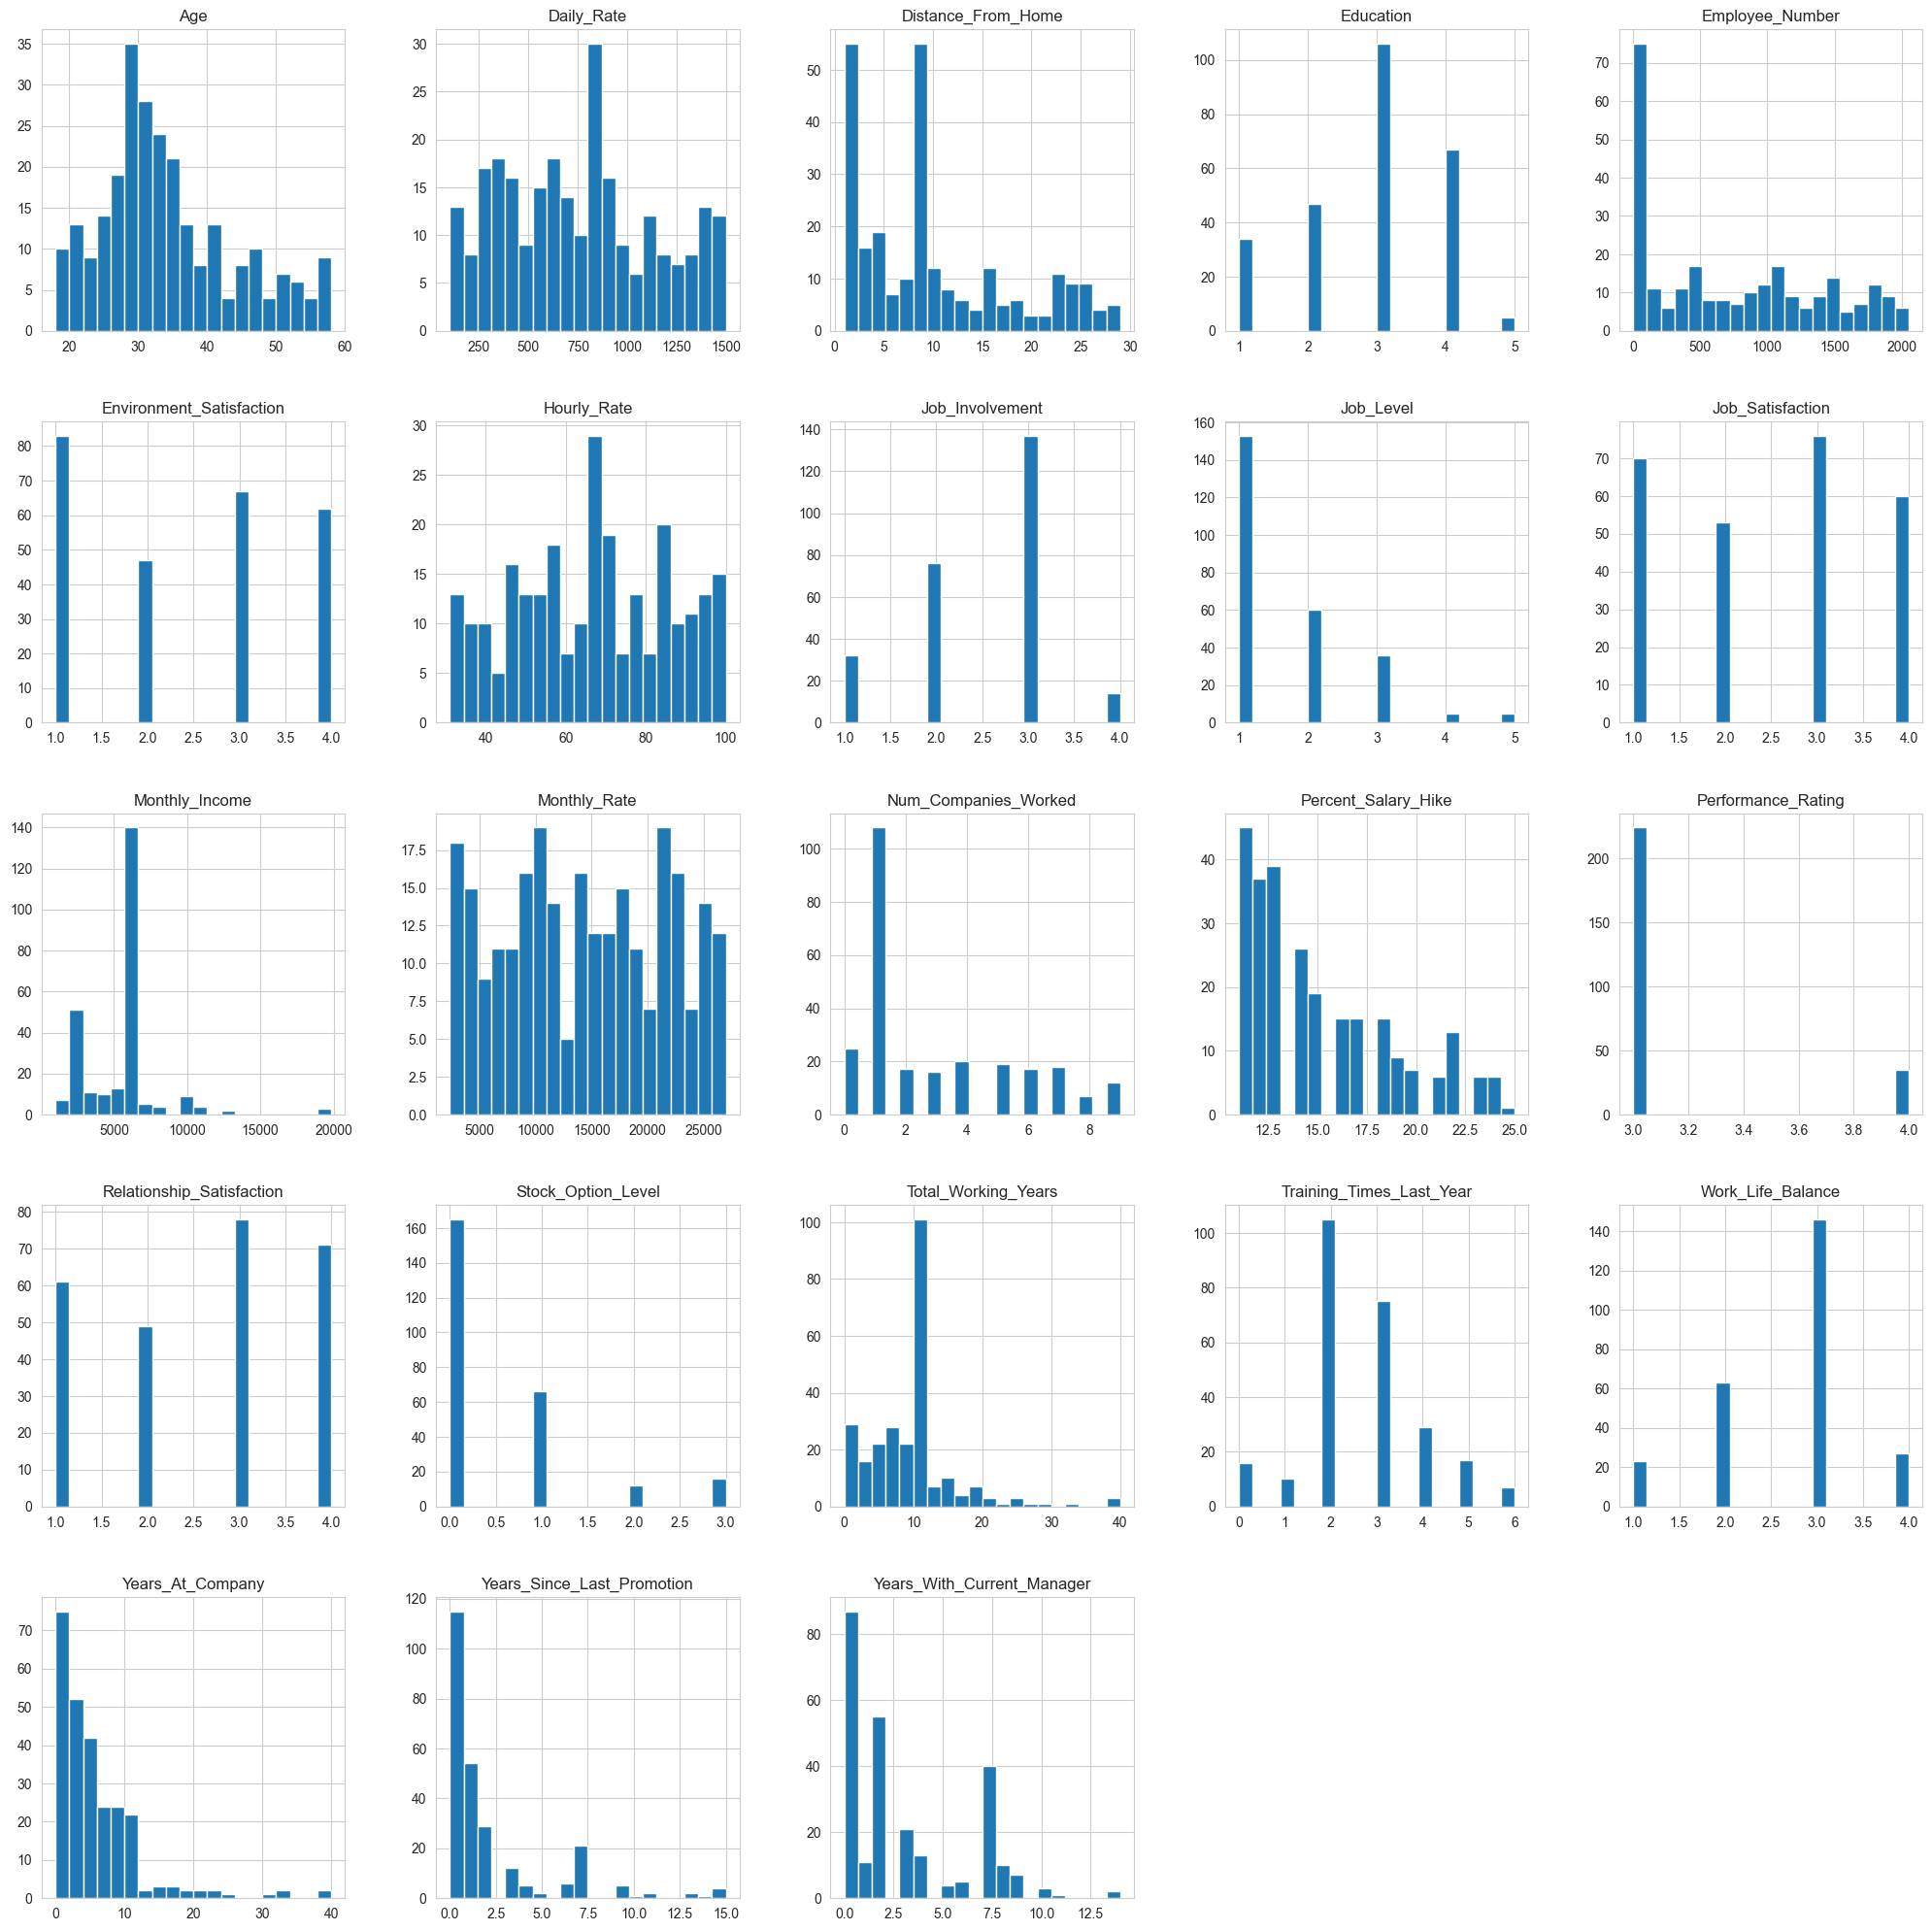

In [1166]:
# Histogramas de todas las variables numéricas del df
df_talento_filtrado.hist(bins=20, figsize=(25,25))
plt.show()

In [1171]:
salario_medio = df_talento.groupby('Attrition')['Monthly_Income'].mean().reset_index().round(2)
salario_medio

,Attrition,Monthly_Income
0,No,6636.59
1,Yes,5646.36
